#Project2: Data Representation and Clustering
Group Members: Zan Xie (UID: 205364923), Joseph Gong (UID: 606073799), Anuk Fernando (UID: 805423707)

# Part 1 - Clustering on Text Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import TruncatedSVD, NMF
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import random
import pandas as pd
import joblib #0.17.0
from sklearn.cluster import KMeans
from sklearn import metrics
import nltk
import string
np.random.seed(0)
random.seed(0)



## Clustering with Sparse Text Representations

### Generate sparse TF-IDF representations

### Q1

In [ ]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
data_features = vectorizer.fit_transform(dataset.data)
data_features = tfidf_transformer.fit_transform(data_features)

In [ ]:
print('Document shape', data_features.shape[0], data_features.shape[1])

Document shape 7882 18469


### Clustering

### Q2 & Q3


In [ ]:
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30, random_state=0)
k_means.fit(data_features)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [ ]:
from sklearn.cluster import KMeans

# Assuming tfidf_vectors is your TF-IDF matrix from earlier
# Initialize the KMeans model
n_clusters = 2  # This should match the range in your for loop
km = KMeans(n_clusters=n_clusters, random_state=42)  # random_state for reproducibility

# Fit the KMeans model
km.fit(data_features)

# Now you can proceed with your original code to print top terms per cluster
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Assuming 'vectorizer' is your TfidfVectorizer or CountVectorizer instance
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() for newer versions of scikit-learn

for i in range(n_clusters):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:  # Adjust the number here to change the number of terms you want to print
        print(' %s' % terms[ind])


Top terms per cluster:
Cluster 0:
 windows
 thanks
 card
 drive
 know
 use
 does
 file
 dos
 problem
Cluster 1:
 just
 like
 don
 game
 think
 car
 good
 year
 know
 team


In [ ]:
import numpy as np
from sklearn import metrics
labels = np.zeros_like(dataset.target)
labels[dataset.target < 4] = 0  # Computer Tech categories
labels[dataset.target >= 4] = 1 # Recreation categories

# Compute the contingency matrix
cm = metrics.cluster.contingency_matrix(labels, km.labels_)
print("Contingency Matrix:\n", cm)

# Print various attributes of the KMeans model
print("Cluster Labels:", km.labels_)
print("Number of Iterations:", km.n_iter_)
print("Shape of Cluster Centers:", km.cluster_centers_.shape)
print("Number of Features In:", km.n_features_in_)

Contingency Matrix:
 [[2529 1374]
 [  30 3949]]
Cluster Labels: [1 0 0 ... 1 1 1]
Number of Iterations: 10
Shape of Cluster Centers: (2, 18469)
Number of Features In: 18469


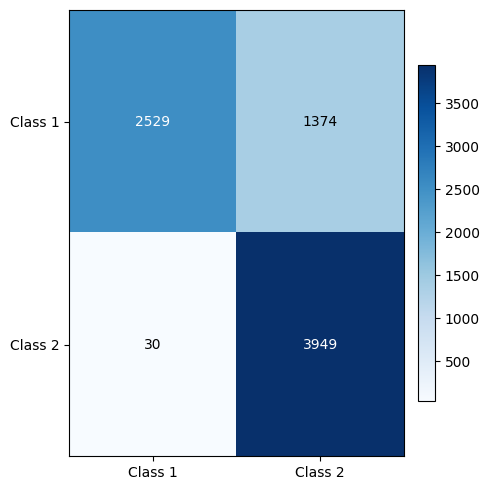

In [ ]:
def plot_mat(mat, xticklabels=None, yticklabels=None, pic_fname=None, size=None, if_show_values=True,
             colorbar=True, xlabel=None, ylabel=None, title=None, vmin=None, vmax=None):
    if size is None:
        # Dynamically adjust figure size for better visualization
        size = (max(4, mat.shape[1] * 0.5), max(4, mat.shape[0] * 0.5))

    plt.figure(figsize=size)
    cmap = plt.get_cmap('Blues')
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    im = plt.imshow(mat, interpolation='nearest', cmap=cmap, norm=norm, aspect='auto')

    # Colorbar
    if colorbar:
        plt.colorbar(im, fraction=0.046, pad=0.04)

    # Set labels
    if xticklabels is None:
        xticklabels = [str(i) for i in range(mat.shape[1])]
    if yticklabels is None:
        yticklabels = [str(i) for i in range(mat.shape[0])]

    plt.xticks(np.arange(mat.shape[1]), labels=xticklabels)
    plt.yticks(np.arange(mat.shape[0]), labels=yticklabels)

    # Labeling the plot
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)
    if title:
        plt.title(title, fontsize=14)

    # Show values in the matrix
    if if_show_values:
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                plt.text(j, i, f'{mat[i, j]:.0f}', ha='center', va='center', color='white' if mat[i, j] > mat.max() / 2 else 'black')

    plt.tight_layout()

    # Save or show the plot
    if pic_fname:
        plt.savefig(pic_fname, dpi=100, transparent=True)
    plt.show()
    plt.close()
plot_mat(cm,size=(5,5),xticklabels = ['Class 1','Class 2'],yticklabels = ['Class 1','Class 2'],pic_fname = 'Q2.png')

No, a contingency matrix does not have to be square-shaped.The shape of the contingency matrix depends on the number of categories in the true labels and the number of categories in the predicted labels. It is square-shaped only if the number of predicted categories matches the number of actual categories.

In [ ]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, km.labels_))

Homogeneity: 0.414
Completeness: 0.455
V-measure: 0.433
Adjusted Rand-Index: 0.414
Adjusted Mutual Information Score: 0.433


## Clustering with Dense Text Representations

### Generate dense representations for better K-Means Clustering

### Q4

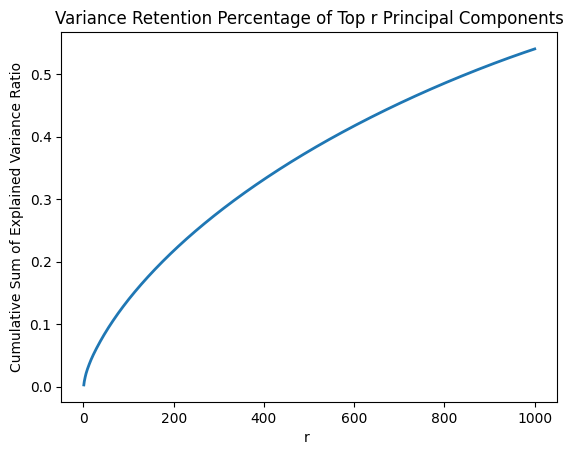

In [ ]:
svd = TruncatedSVD(n_components=1000, random_state=0)
LSI = svd.fit_transform(data_features)
plt.plot(np.linspace(1,1000,1000),np.cumsum(svd.explained_variance_ratio_),lw=2,linestyle='solid')
plt.title('Variance Retention Percentage of Top r Principal Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('r ')
plt.savefig('Q4.png',dpi=300,bbox_inches='tight')
plt.show()

### Q5 & Q6 & Q7

In [ ]:
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

r = [1,2,3,5,10,20,50,100,300]

for i in range(len(r)):
    print('Testing SVD for r = ',r[i])
    svd = TruncatedSVD(n_components=r[i], random_state=0)
    svd_km = svd.fit_transform(data_features)
    kmean_svd = km.fit(svd_km)
    svd_hs.append(homogeneity_score(labels, kmean_svd.labels_))
    svd_cs.append(completeness_score(labels, kmean_svd.labels_))
    svd_vs.append(v_measure_score(labels, kmean_svd.labels_))
    svd_ari.append(adjusted_rand_score(labels, kmean_svd.labels_))
    svd_ms.append(adjusted_mutual_info_score(labels, kmean_svd.labels_))
    print('Testing NMF for r = ',r[i])
    nmf = NMF(n_components=r[i], init='random', random_state=0, max_iter=400)
    nmf_km = nmf.fit_transform(data_features)
    kmean_nmf = km.fit(nmf_km)
    nmf_hs.append(homogeneity_score(labels, kmean_nmf.labels_))
    nmf_cs.append(completeness_score(labels, kmean_nmf.labels_))
    nmf_vs.append(v_measure_score(labels, kmean_nmf.labels_))
    nmf_ari.append(adjusted_rand_score(labels, kmean_nmf.labels_))
    nmf_ms.append(adjusted_mutual_info_score(labels, kmean_nmf.labels_))

print('finish testing.')

Testing SVD for r =  1
Testing NMF for r =  1
Testing SVD for r =  2
Testing NMF for r =  2
Testing SVD for r =  3
Testing NMF for r =  3
Testing SVD for r =  5
Testing NMF for r =  5
Testing SVD for r =  10
Testing NMF for r =  10
Testing SVD for r =  20
Testing NMF for r =  20
Testing SVD for r =  50
Testing NMF for r =  50
Testing SVD for r =  100
Testing NMF for r =  100
Testing SVD for r =  300
Testing NMF for r =  300
finish testing.


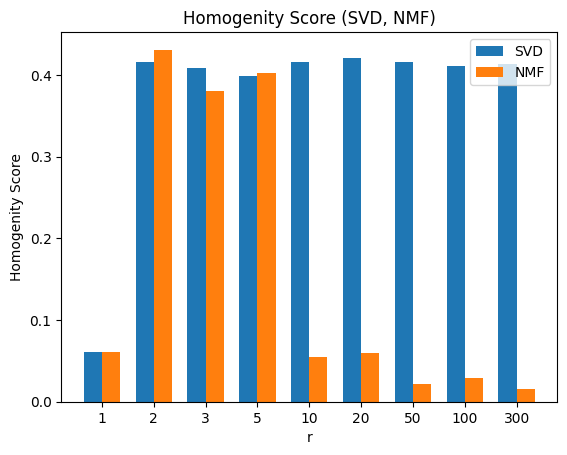

In [ ]:

width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_hs, width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_hs, width, label='NMF')
ax.set_ylabel('Homogenity Score')
ax.set_title('Homogenity Score (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.1.png',dpi=300,bbox_inches='tight')
plt.show()

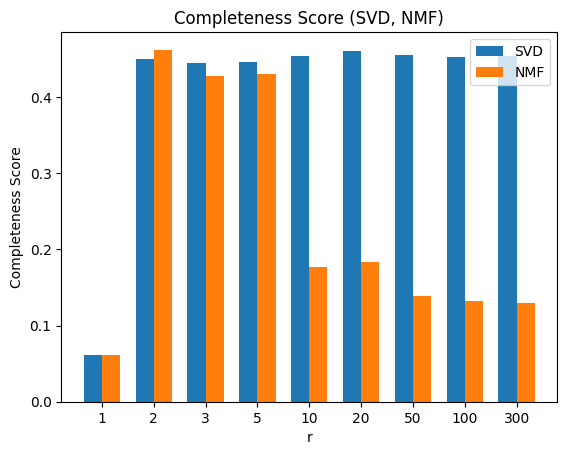

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_cs, width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_cs, width, label='NMF')
ax.set_ylabel('Completeness Score')
ax.set_title('Completeness Score (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.2.png',dpi=300,bbox_inches='tight')
plt.show()

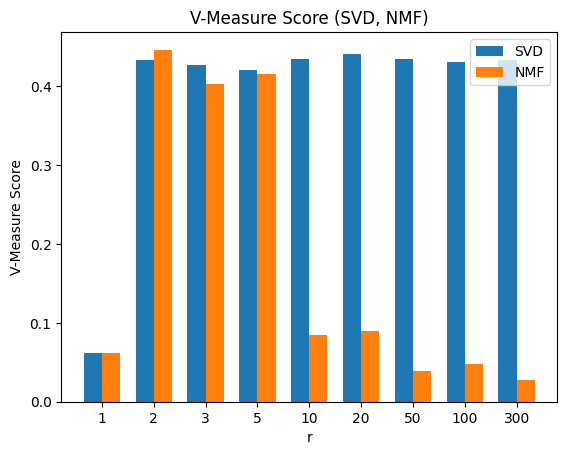

In [ ]:

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_vs, width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_vs, width, label='NMF')
ax.set_ylabel('V-Measure Score')
ax.set_title('V-Measure Score (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.3.png',dpi=300,bbox_inches='tight')
plt.show()

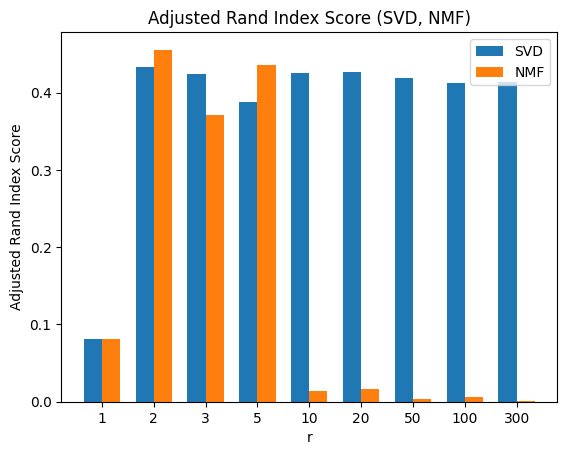

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_ari, width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_ari, width, label='NMF')
ax.set_ylabel('Adjusted Rand Index Score')
ax.set_title('Adjusted Rand Index Score (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.4.png',dpi=300,bbox_inches='tight')
plt.show()


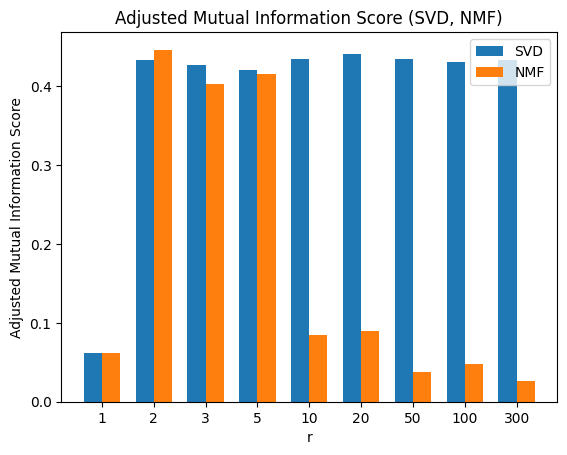

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_ms, width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_ms, width, label='NMF')
ax.set_ylabel('Adjusted Mutual Information Score')
ax.set_title('Adjusted Mutual Information Score (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.5.png',dpi=300,bbox_inches='tight')
plt.show()

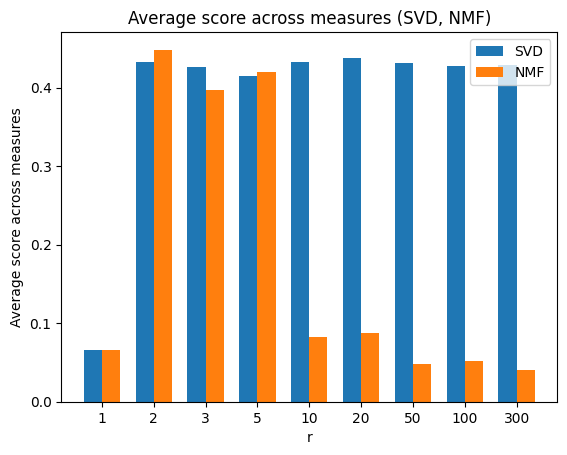

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, [y/5 for y in [sum(x) for x in zip(svd_hs, svd_cs, svd_vs, svd_ari, svd_ms)]], width, label='SVD')
rects2 = ax.bar(np.arange(len(r)) + width/2, [y/5 for y in [sum(x) for x in zip(nmf_hs, nmf_cs, nmf_vs, nmf_ari, nmf_ms)]], width, label='NMF')
ax.set_ylabel('Average score across measures')
ax.set_title('Average score across measures (SVD, NMF)')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5.6.png',dpi=300,bbox_inches='tight')
plt.show()

Q6
we noticed that as r increases, the average score across measures first increase and then decrease. As r increase, we have more information and the value of the measures are increased. As we keep increase r, we can see that measures are decreases. This is because we feed to much information and it becomes a high dimensional matrix

In [ ]:
svd = TruncatedSVD(n_components=20, random_state=0)
svd_km = svd.fit_transform(data_features)
y_svd = km.fit_predict(svd_km)
nmf = NMF(n_components=2, init='random', random_state=0, max_iter=400)
nmf_km = nmf.fit_transform(data_features)
nmf_svd = km.fit_predict(nmf_km)

In [ ]:

print("Homogeneity: %0.3f" % homogeneity_score(labels, y_svd))
print("Completeness: %0.3f" % completeness_score(labels, y_svd))
print("V-measure: %0.3f" % v_measure_score(labels, y_svd))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, y_svd))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, y_svd))

Homogeneity: 0.421
Completeness: 0.460
V-measure: 0.440
Adjusted Rand-Index: 0.427
Adjusted Mutual Information Score: 0.440


In [ ]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, nmf_svd))
print("Completeness: %0.3f" % completeness_score(labels, nmf_svd))
print("V-measure: %0.3f" % v_measure_score(labels, nmf_svd))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, nmf_svd))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, nmf_svd))

Homogeneity: 0.431
Completeness: 0.462
V-measure: 0.446
Adjusted Rand-Index: 0.455
Adjusted Mutual Information Score: 0.446


### Q8

### Visualize the clusters

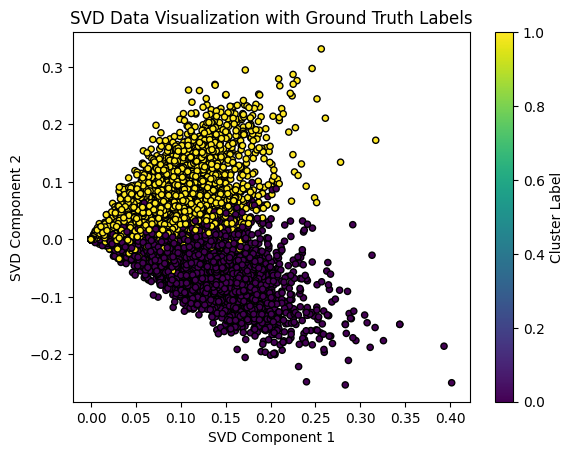

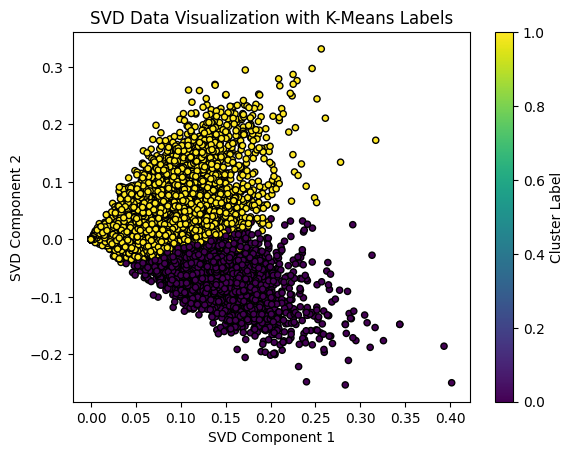

In [ ]:

def plot_svd_data(X, labels, title, filename):
    """
    Plot SVD-transformed data with labels and save the plot to a file.

    Parameters:
    - X: The SVD-transformed data (2D array-like).
    - labels: Labels for each point in X.
    - title: Title of the plot.
    - filename: Filename to save the plot.
    """
    plt.figure()  # Create a new figure
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=20)  # Scatter plot
    plt.title(title)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.colorbar(label='Cluster Label')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_svd_data(svd_km, labels, "SVD Data Visualization with Ground Truth Labels", 'Q71.png')

plot_svd_data(svd_km, y_svd, "SVD Data Visualization with K-Means Labels", 'Q72.png')

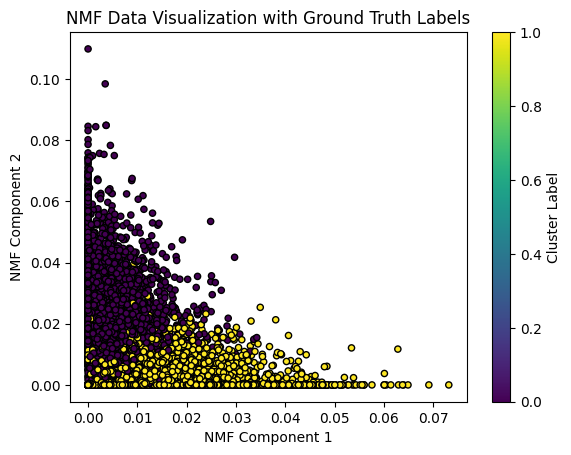

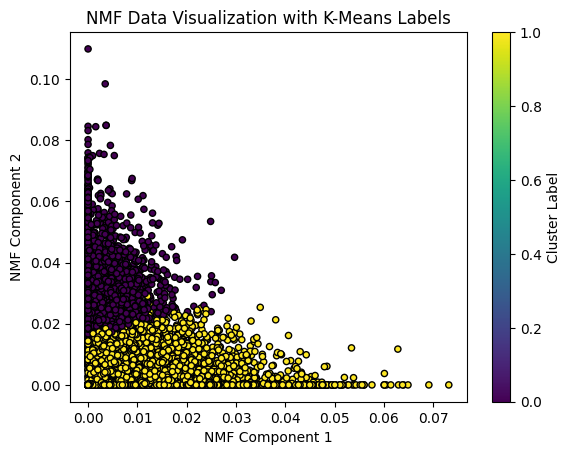

In [ ]:
def plot_nmf_data(X, labels, title, filename):

    plt.figure()  # Create a new figure
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=20)  # Scatter plot
    plt.title(title)
    plt.xlabel('NMF Component 1')
    plt.ylabel('NMF Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()



# Plot with ground truth labels
plot_nmf_data(nmf_km, labels, "NMF Data Visualization with Ground Truth Labels", 'Q73.png')

# Plot with K-Means labels
plot_nmf_data(nmf_km, y_svd, "NMF Data Visualization with K-Means Labels", 'Q74.png')

### Q9

1. we can noticed that there exist an overlap of clusters for both SVD and NMF.
2. SVD and NMF have different variances.

### Clustering of the Entire 20 Classes

### Q10

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import TruncatedSVD, NMF
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import umap.umap_ as umap #0.4.6
import joblib #0.17.0
np.random.seed(0)
random.seed(0)

In [ ]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
data_vec = vectorizer.fit_transform(dataset.data)
data = tfidf_transformer.fit_transform(data_vec)

In [ ]:
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []

km = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
r = [1,2,3,5,10,20,50,100,300]

for i in range(len(r)):
    print('Testing SVD for r = ',r[i])
    svd = TruncatedSVD(n_components=r[i], random_state=0)
    svd_km = svd.fit_transform(data)
    kmean_svd = km.fit(svd_km)
    svd_hs.append(homogeneity_score(dataset.target, kmean_svd.labels_))
    svd_cs.append(completeness_score(dataset.target, kmean_svd.labels_))
    svd_vs.append(v_measure_score(dataset.target, kmean_svd.labels_))
    svd_ari.append(adjusted_rand_score(dataset.target, kmean_svd.labels_))
    svd_ms.append(adjusted_mutual_info_score(dataset.target, kmean_svd.labels_))
print('finished')

Testing SVD for r =  1
Testing SVD for r =  2
Testing SVD for r =  3
Testing SVD for r =  5
Testing SVD for r =  10
Testing SVD for r =  20
Testing SVD for r =  50
Testing SVD for r =  100
Testing SVD for r =  300
finished


In [ ]:
print('R: ',r)
print('Homogeneity (SVD, various r): ',svd_hs)
print('Completeness (SVD, various r): ',svd_cs)
print('V-measure (SVD, various r): ',svd_vs)
print('Adjusted Rand-Index (SVD, various r): ',svd_ari)
print('Adjusted Mutual Information Score (SVD, various r): ',svd_ms)


R:  [1, 2, 3, 5, 10, 20, 50, 100, 300]
Homogeneity (SVD, various r):  [0.024233513537244948, 0.21234220367375345, 0.24711172744480642, 0.3201627171469848, 0.3249404940397353, 0.33303533030565696, 0.28388555847121427, 0.33075453401330535, 0.29762514388386213]
Completeness (SVD, various r):  [0.026739966333863642, 0.22459003819124515, 0.26536211866091747, 0.3482890305417126, 0.35426226076325223, 0.3756147353734766, 0.3556956839271338, 0.3999846479644101, 0.3720767741278083]
V-measure (SVD, various r):  [0.02542511665971004, 0.21829445878904252, 0.2559119535133702, 0.3336341411516646, 0.3389684544652214, 0.3530458360796032, 0.3157593162013462, 0.3620901659929848, 0.3307125168893497]
Adjusted Rand-Index (SVD, various r):  [0.005297741266282442, 0.06575955994455099, 0.08309902112064539, 0.1259875510824014, 0.12285669602358998, 0.12021994803797648, 0.07936131715268141, 0.1113858195844356, 0.08796142781878807]
Adjusted Mutual Information Score (SVD, various r):  [0.022085896272956634, 0.21569

In [ ]:
number_of_clusters = 5  # Adjust based on your dataset and goals

# Initialize KMeans with a predefined number of clusters and random state
km = KMeans(n_clusters=number_of_clusters, random_state=1)

# Apply Truncated SVD followed by KMeans clustering
svd = TruncatedSVD(n_components=best_r_SVD, random_state=1)
svd_km = svd.fit_transform(data)
kmean_svd = km.fit(svd_km)

# Function to print clustering evaluation metrics
def print_metrics(label_true, label_pred, method):
    print(f"{method}:")
    print(f"  Homogeneity: {homogeneity_score(label_true, label_pred):.3f}")
    print(f"  Completeness: {completeness_score(label_true, label_pred):.3f}")
    print(f"  V-measure: {v_measure_score(label_true, label_pred):.3f}")
    print(f"  Adjusted Rand Index: {adjusted_rand_score(label_true, label_pred):.3f}")
    print(f"  Adjusted Mutual Information: {adjusted_mutual_info_score(label_true, label_pred):.3f}\n")

# Print evaluation metrics for SVD
print_metrics(dataset.target, kmean_svd.labels_, "SVD, best r")

SVD, best r:
  Homogeneity: 0.211
  Completeness: 0.535
  V-measure: 0.302
  Adjusted Rand Index: 0.064
  Adjusted Mutual Information: 0.301



In [ ]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []
r = [1,2,3,5,10,20,50,100,300]
for i in range(len(r)-1):
    print('Testing NMF for r = ',r[i])
    nmf = NMF(n_components=r[i], init='random', random_state=0, max_iter=400)
    nmf_km = nmf.fit_transform(data)
    kmean_nmf = km.fit(nmf_km)
    nmf_hs.append(homogeneity_score(dataset.target, kmean_nmf.labels_))
    nmf_cs.append(completeness_score(dataset.target, kmean_nmf.labels_))
    nmf_vs.append(v_measure_score(dataset.target, kmean_nmf.labels_))
    nmf_ari.append(adjusted_rand_score(dataset.target, kmean_nmf.labels_))
    nmf_ms.append(adjusted_mutual_info_score(dataset.target, kmean_nmf.labels_))
print('finished')

Testing NMF for r =  1
Testing NMF for r =  2
Testing NMF for r =  3
Testing NMF for r =  5
Testing NMF for r =  10
Testing NMF for r =  20
Testing NMF for r =  50
Testing NMF for r =  100
finished


In [ ]:
print('R: ',r[:-1])
print('Homogeneity (NMF, various r): ',nmf_hs)
print('Completeness (NMF, various r): ',nmf_cs)
print('V-measure (NMF, various r): ',nmf_vs)
print('Adjusted Rand-Index (NMF, various r): ',nmf_ari)
print('Adjusted Mutual Information Score (NMF, various r): ',nmf_ms)
avg_metrics = [y/5 for y in [sum(x) for x in zip(nmf_hs, nmf_cs, nmf_vs, nmf_ari, nmf_ms)]]
best_r_NMF = r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for NMF (according to avg. metric): ', best_r_NMF, ', avg. value of 5 metrics: ',max(avg_metrics))

R:  [1, 2, 3, 5, 10, 20, 50, 100]
Homogeneity (NMF, various r):  [0.024239137233529013, 0.19219640113142317, 0.21759697070078024, 0.2676257983910961, 0.2879484499953905, 0.2744487797074484, 0.23308715900100005, 0.14850893908931312]
Completeness (NMF, various r):  [0.02674619037376781, 0.20502118735704658, 0.25618728054841566, 0.2894194889873765, 0.32735687783663897, 0.3526034280542061, 0.33967885032303613, 0.19102666978534671]
V-measure (NMF, various r):  [0.025431025330945125, 0.1984017601821748, 0.23532051152998631, 0.27809631843295274, 0.30639066916749624, 0.30865557716662495, 0.2764646536478743, 0.16710570158818844]
Adjusted Rand-Index (NMF, various r):  [0.0052999337984488476, 0.05819280806933572, 0.06716437022801673, 0.08738192611077013, 0.09948113152861335, 0.07171551160239839, 0.05321033198953036, 0.03306317949656457]
Adjusted Mutual Information Score (NMF, various r):  [0.022091824061119494, 0.19571494709338658, 0.23261094027960347, 0.27566789501861017, 0.30398939140104586, 0.

In [ ]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
number_of_clusters = 5
km = KMeans(n_clusters=number_of_clusters, random_state=1)
# Apply standard NMF followed by KMeans clustering
nmf_normal = NMF(n_components=best_r_NMF, init='random', random_state=1, max_iter=1000)
nmf_km_normal = nmf_normal.fit_transform(data)
kmean_nmf_normal = km.fit(nmf_km_normal)
# Apply NMF with KL divergence followed by KMeans clustering
nmf_KL = NMF(n_components=best_r_NMF, init='random', random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=1000, l1_ratio=.5)
nmf_km_KL = nmf_KL.fit_transform(data)
kmean_nmf_KL = km.fit(nmf_km_KL)
# Print evaluation metrics
def print_metrics(label_true, label_pred, method):
    print(f"{method}:")
    print(f"  Homogeneity: {homogeneity_score(label_true, label_pred):.3f}")
    print(f"  Completeness: {completeness_score(label_true, label_pred):.3f}")
    print(f"  V-measure: {v_measure_score(label_true, label_pred):.3f}")
    print(f"  Adjusted Rand Index: {adjusted_rand_score(label_true, label_pred):.3f}")
    print(f"  Adjusted Mutual Information: {adjusted_mutual_info_score(label_true, label_pred):.3f}\n")

print_metrics(dataset.target, kmean_nmf_normal.labels_, "NMF Normal, best r")
print_metrics(dataset.target, kmean_nmf_KL.labels_, "NMF KL, best r")

NMF Normal, best r:
  Homogeneity: 0.279
  Completeness: 0.631
  V-measure: 0.387
  Adjusted Rand Index: 0.105
  Adjusted Mutual Information: 0.386

NMF KL, best r:
  Homogeneity: 0.279
  Completeness: 0.631
  V-measure: 0.387
  Adjusted Rand Index: 0.105
  Adjusted Mutual Information: 0.386



### UMAP

### Q11
The contingency matrix and five clustering metric of 6 combination has been shown below.

In [ ]:
# install umap and plotmat module
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9e66284ad5aca61463eb9682ef24c52d61119e3c0c3af04119c85243910e03e2
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP
from plotmat import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster  import (
    contingency_matrix,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_rand_score,
    adjusted_mutual_info_score
)

# define parameters
n_components_list = [5, 20, 200]
metrics_list = ['cosine', 'euclidean']
kmeans = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0,) # 20 catag, max_iter>=1000, n_init>=30

# Fetch the dataset
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=0, remove=('headers', 'footers', 'quotes'))
true_label = dataset.target

# TfidfVectorizer and fit_transform dataset
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
data_tfidf = tfidf_vectorizer.fit_transform(dataset.data)

# define dimention reduction and evaluation metric function
def umap_reduce_dim(data, n, metric):
  umap_model = UMAP(n_components=n, metric=metric)
  data_umap = umap_model.fit_transform(data)
  return data_umap

def eval_metric(true_label, pred_label, plot_matrix):
  homogeneity = homogeneity_score(true_label, pred_label)
  completeness = completeness_score(true_label, pred_label)
  v_measure = v_measure_score(true_label, pred_label)
  adjusted_rand = adjusted_rand_score(true_label, pred_label)
  adjusted_mutual_info = adjusted_mutual_info_score(true_label, pred_label)

  # Plot matrix
  if (plot_matrix):
    cm = contingency_matrix(true_label, pred_label)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

  print('-'*20)
  print('homogeneity:', homogeneity)
  print('completeness:', completeness)
  print('v_measure:', v_measure)
  print('adjusted_rand:', adjusted_rand)
  print('adjusted_mutual_info:', adjusted_mutual_info)
  print('-'*20)

metric:cosine
n_components: 5


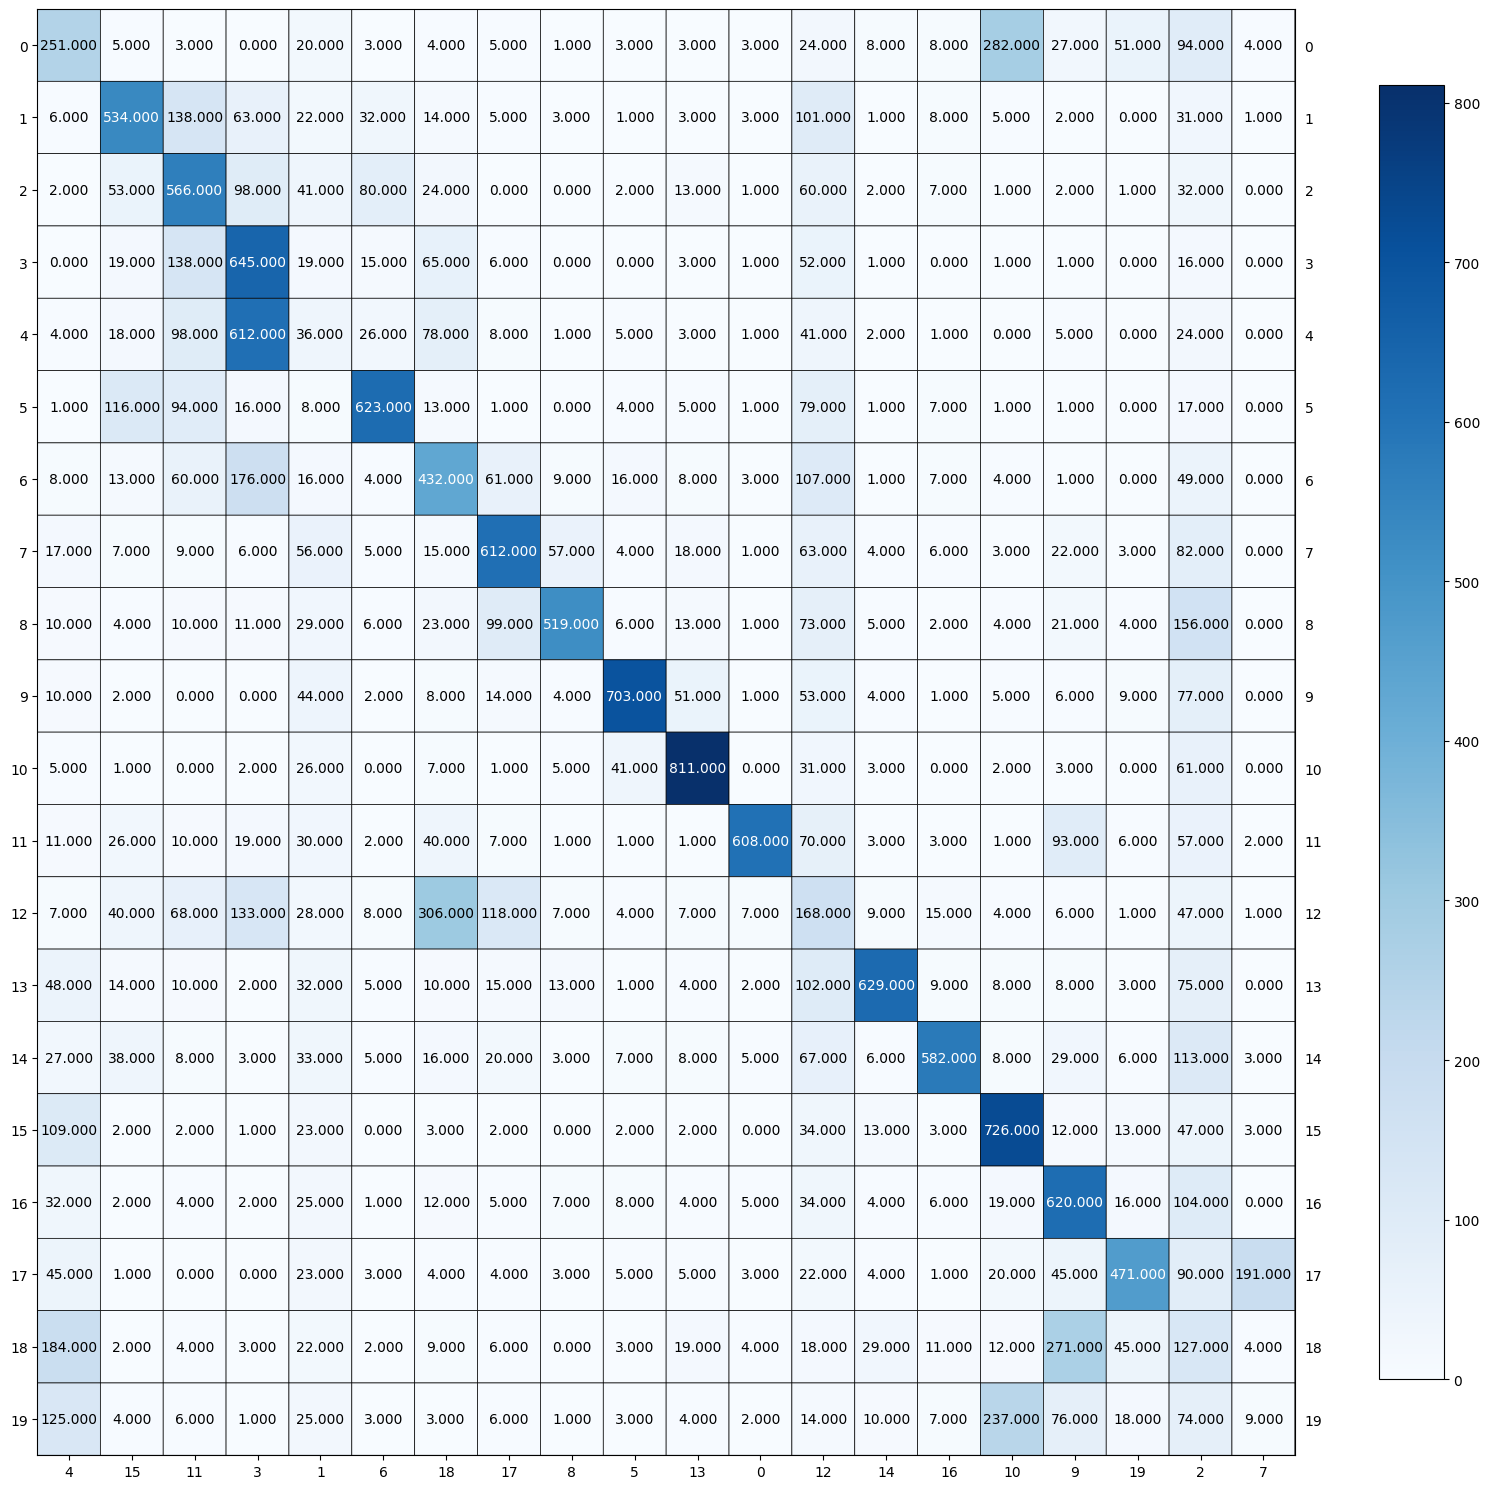

--------------------
UMAP transformation evaluation
homogeneity: 0.467385740278117
completeness: 0.47783014850254296
v_measure: 0.47255024029095266
adjusted_rand: 0.32833477408443634
adjusted_mutual_info: 0.47082799857430785
--------------------
metric:cosine
n_components: 20


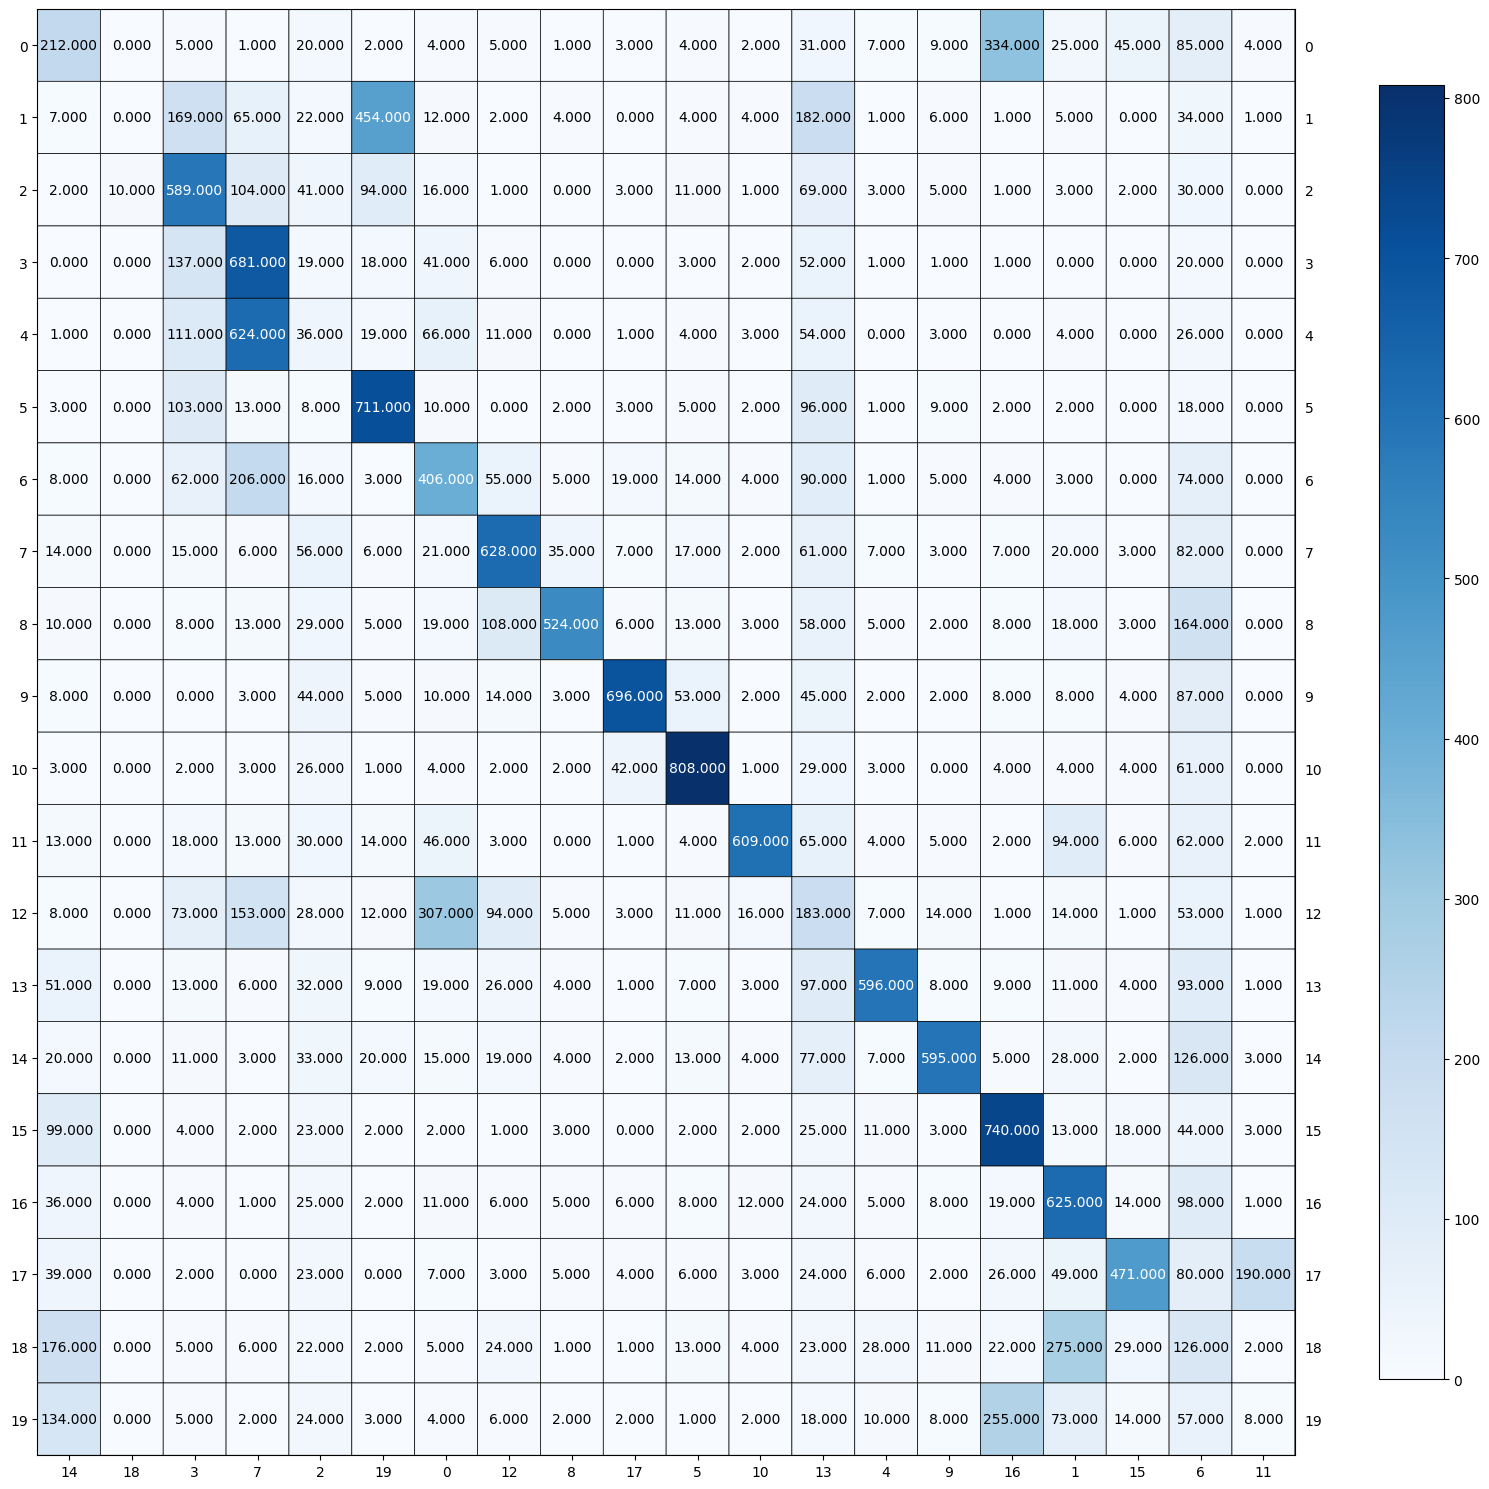

--------------------
UMAP transformation evaluation
homogeneity: 0.4583907596193378
completeness: 0.4789972844962652
v_measure: 0.46846752628042887
adjusted_rand: 0.32138239635863264
adjusted_mutual_info: 0.46671091205942605
--------------------
metric:cosine
n_components: 200


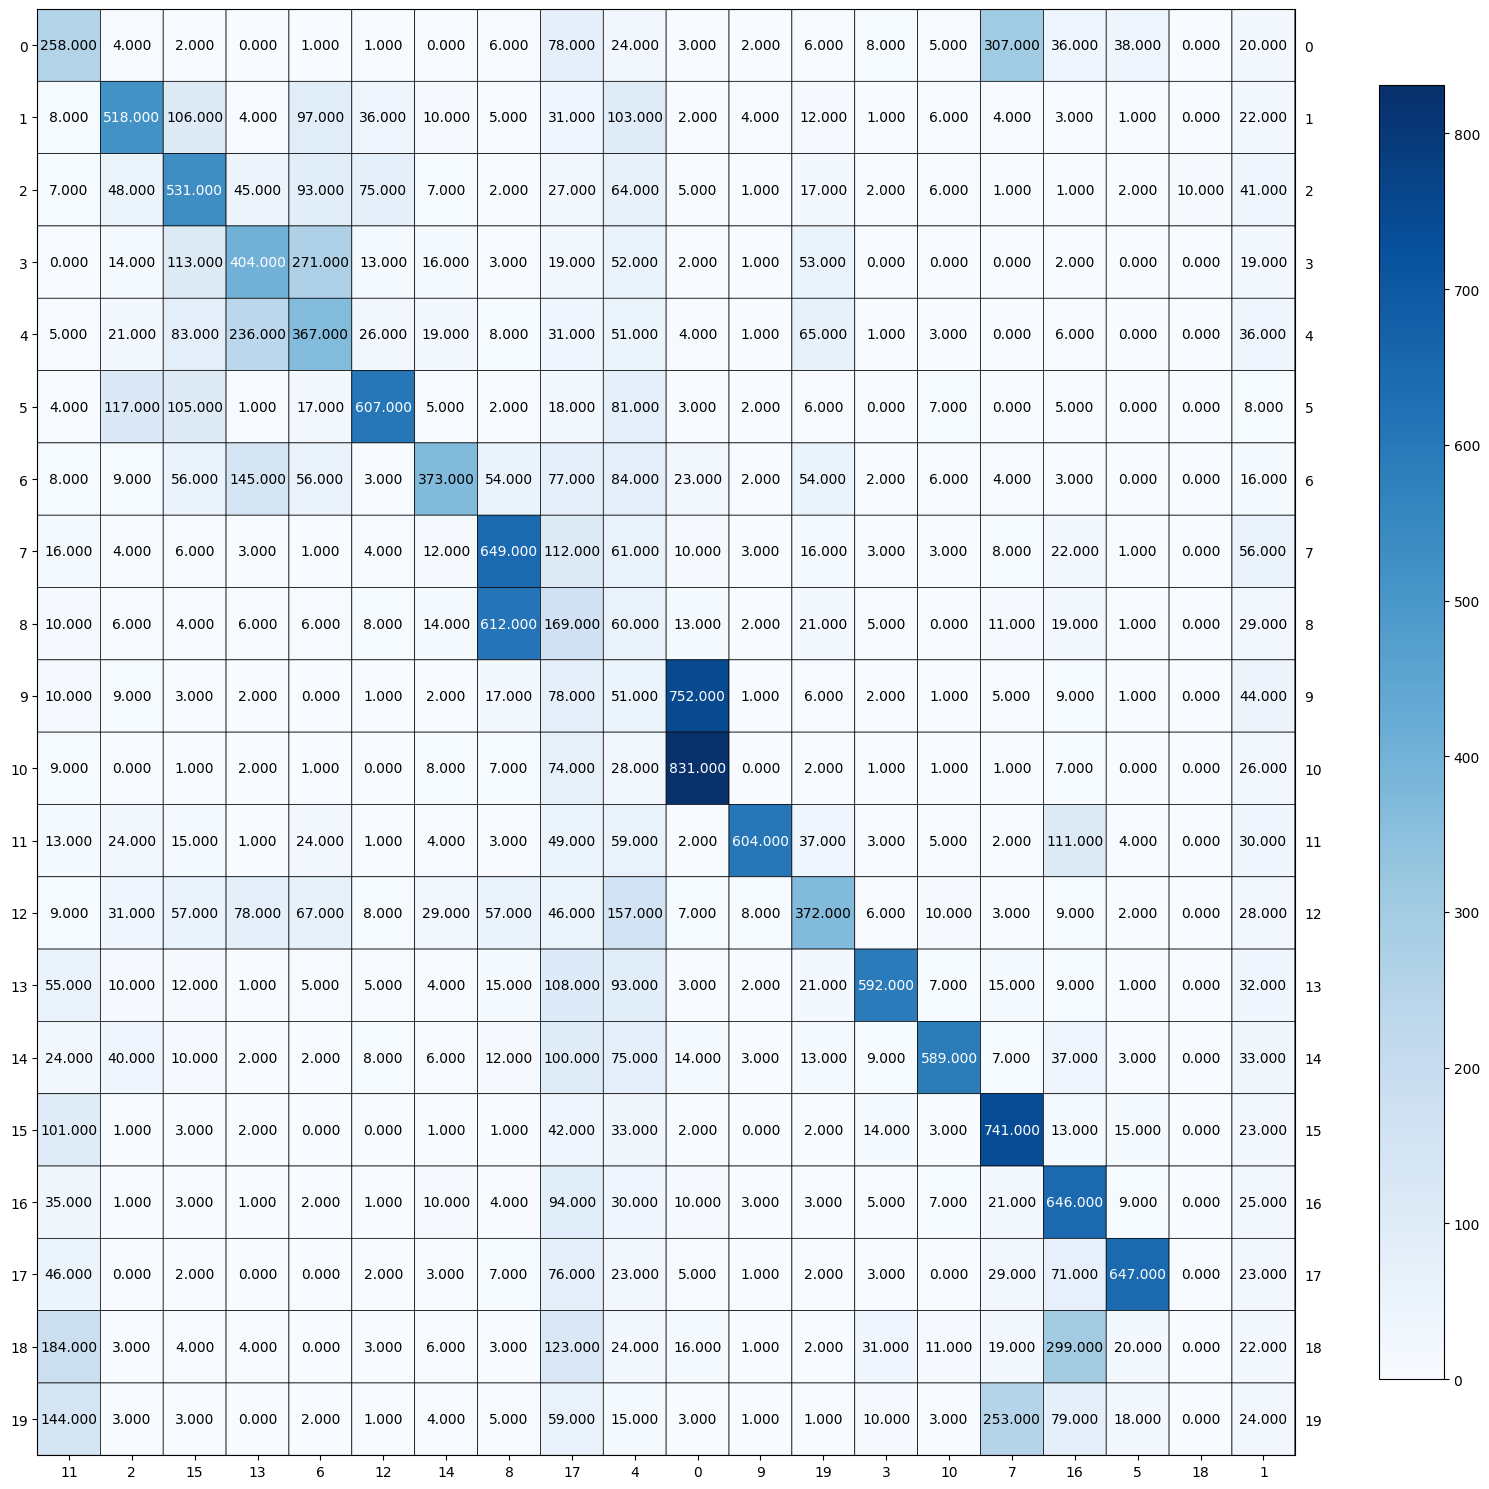

--------------------
UMAP transformation evaluation
homogeneity: 0.4555980076198617
completeness: 0.4714940290080402
v_measure: 0.4634097408538983
adjusted_rand: 0.3198385335476356
adjusted_mutual_info: 0.4616459152801552
--------------------


In [ ]:
# metric=cosine
for x in n_components_list:
  print('metric:cosine')
  print('n_components:', x)
  data_umap = umap_reduce_dim(data_tfidf, x, 'cosine')
  pred_label = kmeans.fit_predict(data_umap)
  eval_metric(true_label, pred_label, 1)

metric:euclidean
n_components: 5


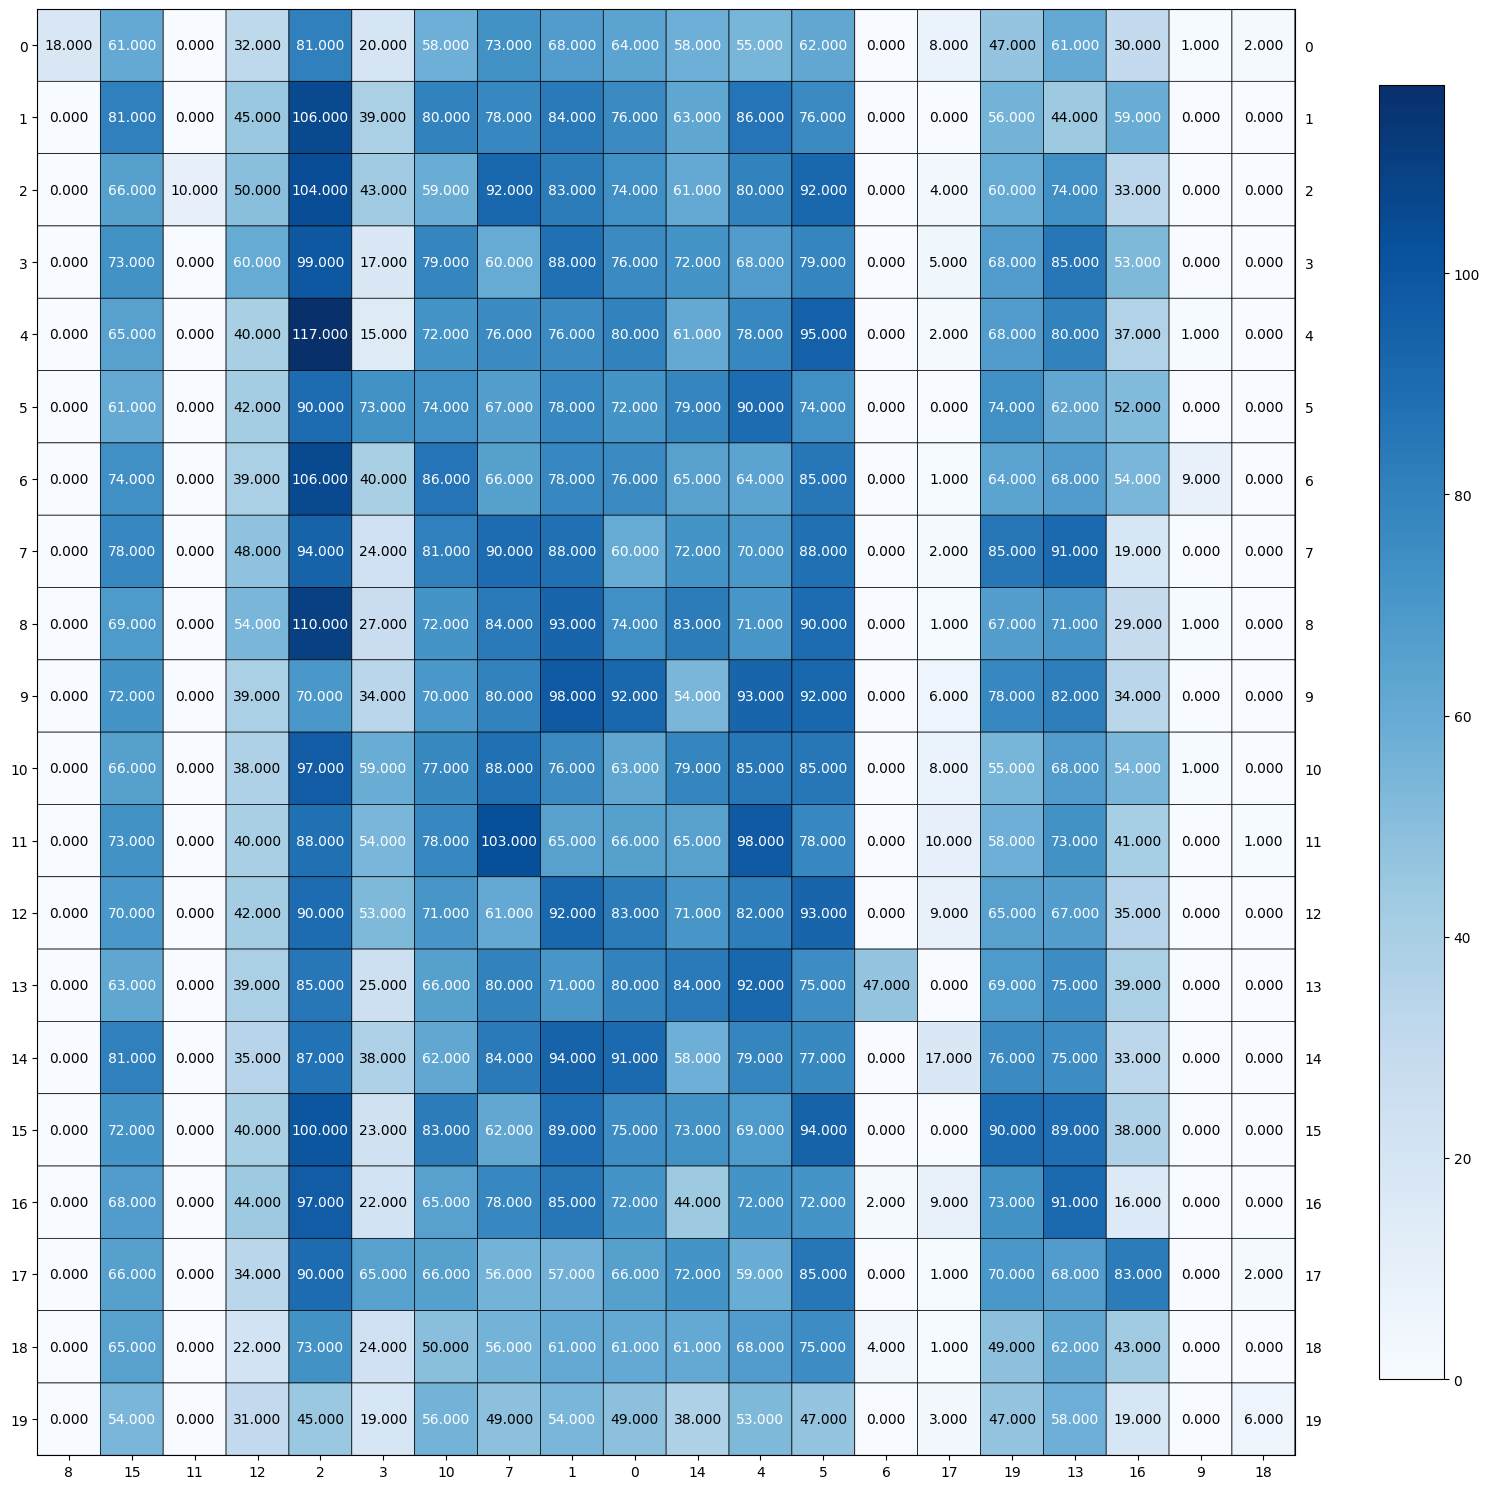

--------------------
UMAP transformation evaluation
homogeneity: 0.010115835888449937
completeness: 0.011401904065759805
v_measure: 0.010720437238345856
adjusted_rand: 0.000753102405311995
adjusted_mutual_info: 0.007253351741174775
--------------------
metric:euclidean
n_components: 20


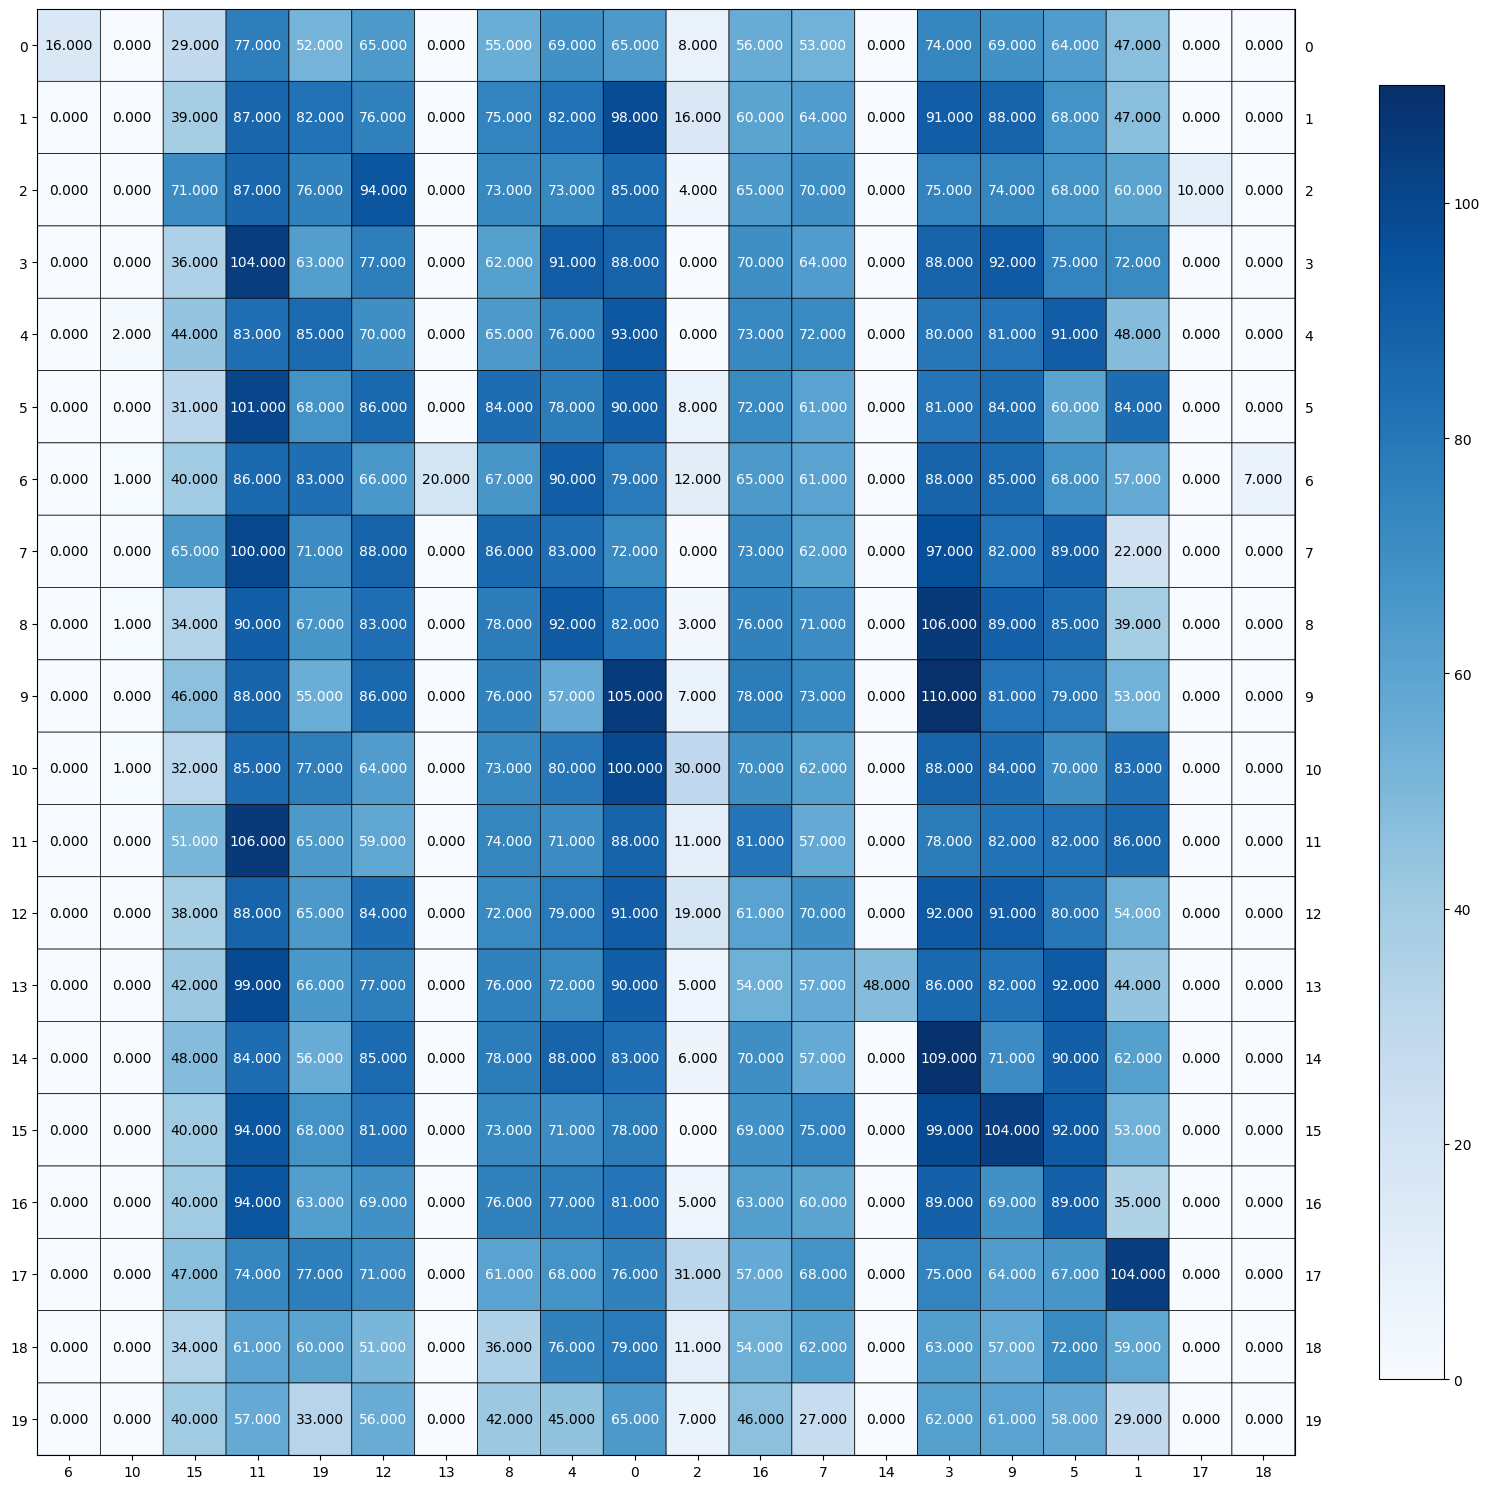

--------------------
UMAP transformation evaluation
homogeneity: 0.01032688793763378
completeness: 0.011841131010539458
v_measure: 0.011032292356530839
adjusted_rand: 0.0006020917950067842
adjusted_mutual_info: 0.007596335763922425
--------------------
metric:euclidean
n_components: 200


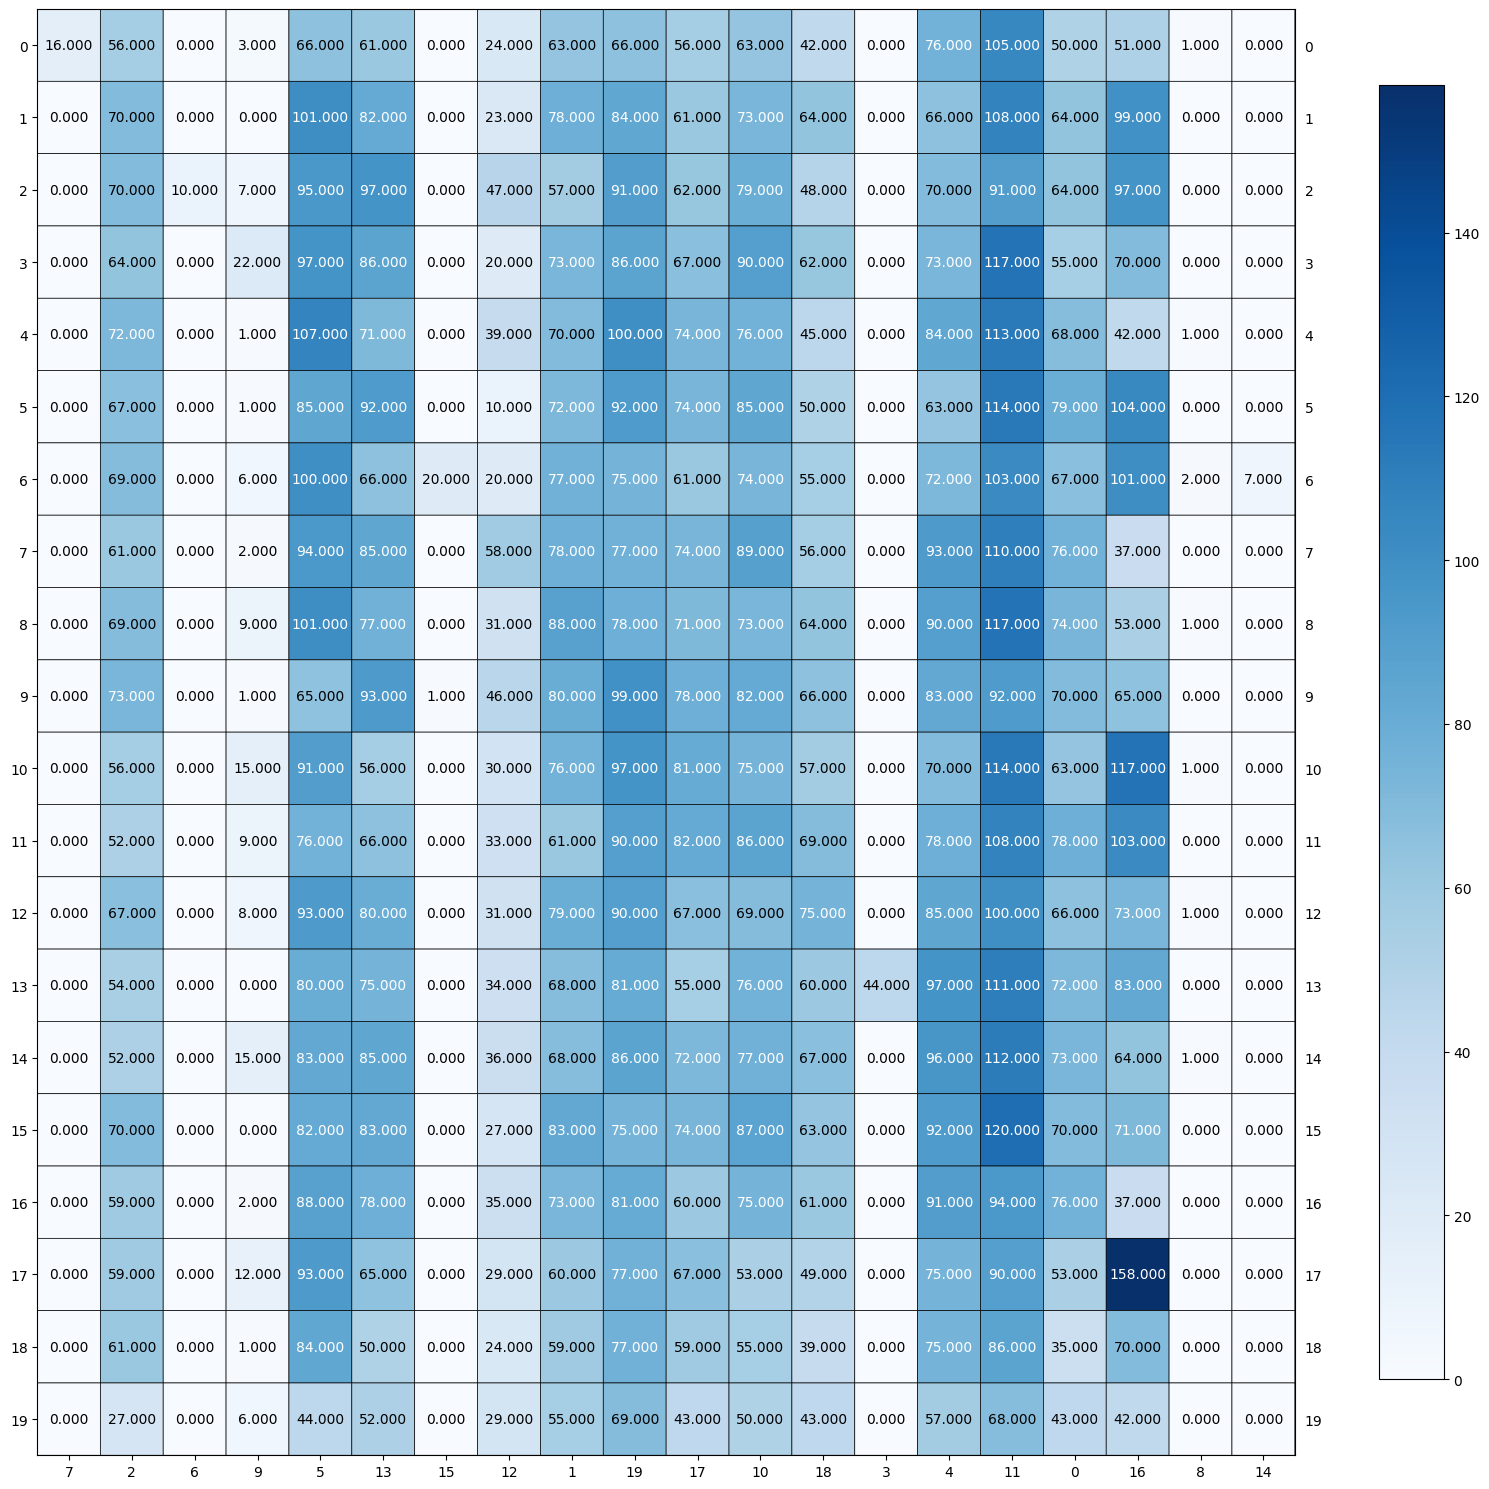

--------------------
UMAP transformation evaluation
homogeneity: 0.010755640343811311
completeness: 0.012427639089172302
v_measure: 0.011531346697711397
adjusted_rand: 0.0009974788664136448
adjusted_mutual_info: 0.008049949528093965
--------------------


In [ ]:
# metric=euclidean
for x in n_components_list:
  print('metric:euclidean')
  print('n_components:', x)
  data_umap = umap_reduce_dim(data_tfidf, x, 'euclidean')
  pred_label = kmeans.fit_predict(data_umap)
  eval_metric(true_label, pred_label, 1)

### Q12
(1) By observing contingency matrix, cosine metric works better than euclidean. Contingency matrix rows = true class and column = predict class. Ideally, contingency matrix has value in diagonal and 0 elsewhere, meaning perfect prediction. cosine metric close to the ideal representation while euclidean metric has spread value in its contingency matrix.<br>
(2) Within cosine metric, their performance are very close to each other given n_components = 5, 20, 200. By comparing V-measure-score, the case of n_component = 5 seems to perform better.

### Q13
TF_IDF<br>
Homogeneity: 0.414<br>
Completeness: 0.455<br>
V-measure: 0.433<br>
Adjusted Rand-Index: 0.414<br>
Adjusted Mutual Information Score: 0.433<br>
PCA<br>
Homogeneity: 0.211<br>
Completeness: 0.535<br>
V-measure: 0.302<br>
Adjusted Rand Index: 0.064<br>
Adjusted Mutual Information: 0.301<br>
NMF<br>
Homogeneity: 0.279<br>
Completeness: 0.631<br>
V-measure: 0.387<br>
Adjusted Rand Index: 0.105<br>
Adjusted Mutual Information: 0.386<br>
UMAP<br>
homogeneity: 0.467385740278117<br>
completeness: 0.47783014850254296<br>
v_measure: 0.47255024029095266<br>
adjusted_rand: 0.32833477408443634<br>
adjusted_mutual_info: 0.47082799857430785<br><br>

V_measure is the harmonic mean of homogeneity and completeness. It provides a single score that balances both homogeneity and completeness, ranging from 0 to 1. I will be comparing this single metric here.<br>
Apprently, UMAP has the highest V_measure score and should be the optimal choice of learning technique.



## Clustering Algorithms that do not explicitly rely on the Gaussian distribution per cluster

### Agglomerative Clustering

### Q14
The five clustering metrics of two linkages type have been shown below. The ward linkage has a better performance overall.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define parameter
linkage_list = ['ward', 'single']
data_umap = umap_reduce_dim(data_tfidf, 20, 'cosine') # umap, n=20, cosine

for x in linkage_list:
  print('UMAP, metric:cosine, n_components:20')
  print('AgglomerativeClustering')
  print('linkage:', x)
  ac_model = AgglomerativeClustering(n_clusters=20, linkage=x)
  pred_label = ac_model.fit_predict(data_umap)
  eval_metric(true_label, pred_label, 0)


UMAP, metric:cosine, n_components:20
AgglomerativeClustering
linkage: ward
--------------------
homogeneity: 0.4345555454703719
completeness: 0.4542374946547568
v_measure: 0.4441785958067431
adjusted_rand: 0.3052439231787983
adjusted_mutual_info: 0.4423420799344438
--------------------
UMAP, metric:cosine, n_components:20
AgglomerativeClustering
linkage: single
--------------------
homogeneity: 0.007383215917494096
completeness: 0.11395458326446142
v_measure: 0.013867917478343345
adjusted_rand: 0.00010398414032180294
adjusted_mutual_info: 0.009630920973101385
--------------------


### HDBSCAN

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=8920f9742d3a8977f5153838d7dbfd12f833bbc28b2734156d1e41205fe63b43
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


### Q15
The five clustering metrics of different min_cluster_size have been shown below. The best cluster_size has been found to be 20 by comparing their V_measure_score.

In [ ]:
from hdbscan import HDBSCAN

# define parameter
min_cluster_size = [20, 100, 200]
data_umap = umap_reduce_dim(data_tfidf, 20, 'cosine') # umap, n=20, cosine

for x in min_cluster_size:
  print('UMAP, metric:cosine, n_components:20')
  print('HDBSCAN')
  print('min_cluster_size:', x)
  hdb_model = HDBSCAN(min_cluster_size=x)
  pred_label = hdb_model.fit_predict(data_umap)
  eval_metric(true_label, pred_label, 0)


UMAP, metric:cosine, n_components:20
HDBSCAN
min_cluster_size: 20
--------------------
homogeneity: 0.3226206569201525
completeness: 0.3766897479053321
v_measure: 0.3475649528041346
adjusted_rand: 0.04868033113564614
adjusted_mutual_info: 0.33505899283688606
--------------------
UMAP, metric:cosine, n_components:20
HDBSCAN
min_cluster_size: 100
--------------------
homogeneity: 0.0006552127147777763
completeness: 0.014709881628520995
v_measure: 0.0012545450435306278
adjusted_rand: 2.559996010683873e-05
adjusted_mutual_info: 0.0009299392203344425
--------------------
UMAP, metric:cosine, n_components:20
HDBSCAN
min_cluster_size: 200
--------------------
homogeneity: 0.0006552127147777763
completeness: 0.014709881628520995
v_measure: 0.0012545450435306278
adjusted_rand: 2.559996010683873e-05
adjusted_mutual_info: 0.0009299392203344425
--------------------


### Q16
The coningency matrix for the best clustering model, min_cluster_size=5 has been shown below.

UMAP, metric:cosine, n_components: 20
HDBSCAN
min_cluster_size:20


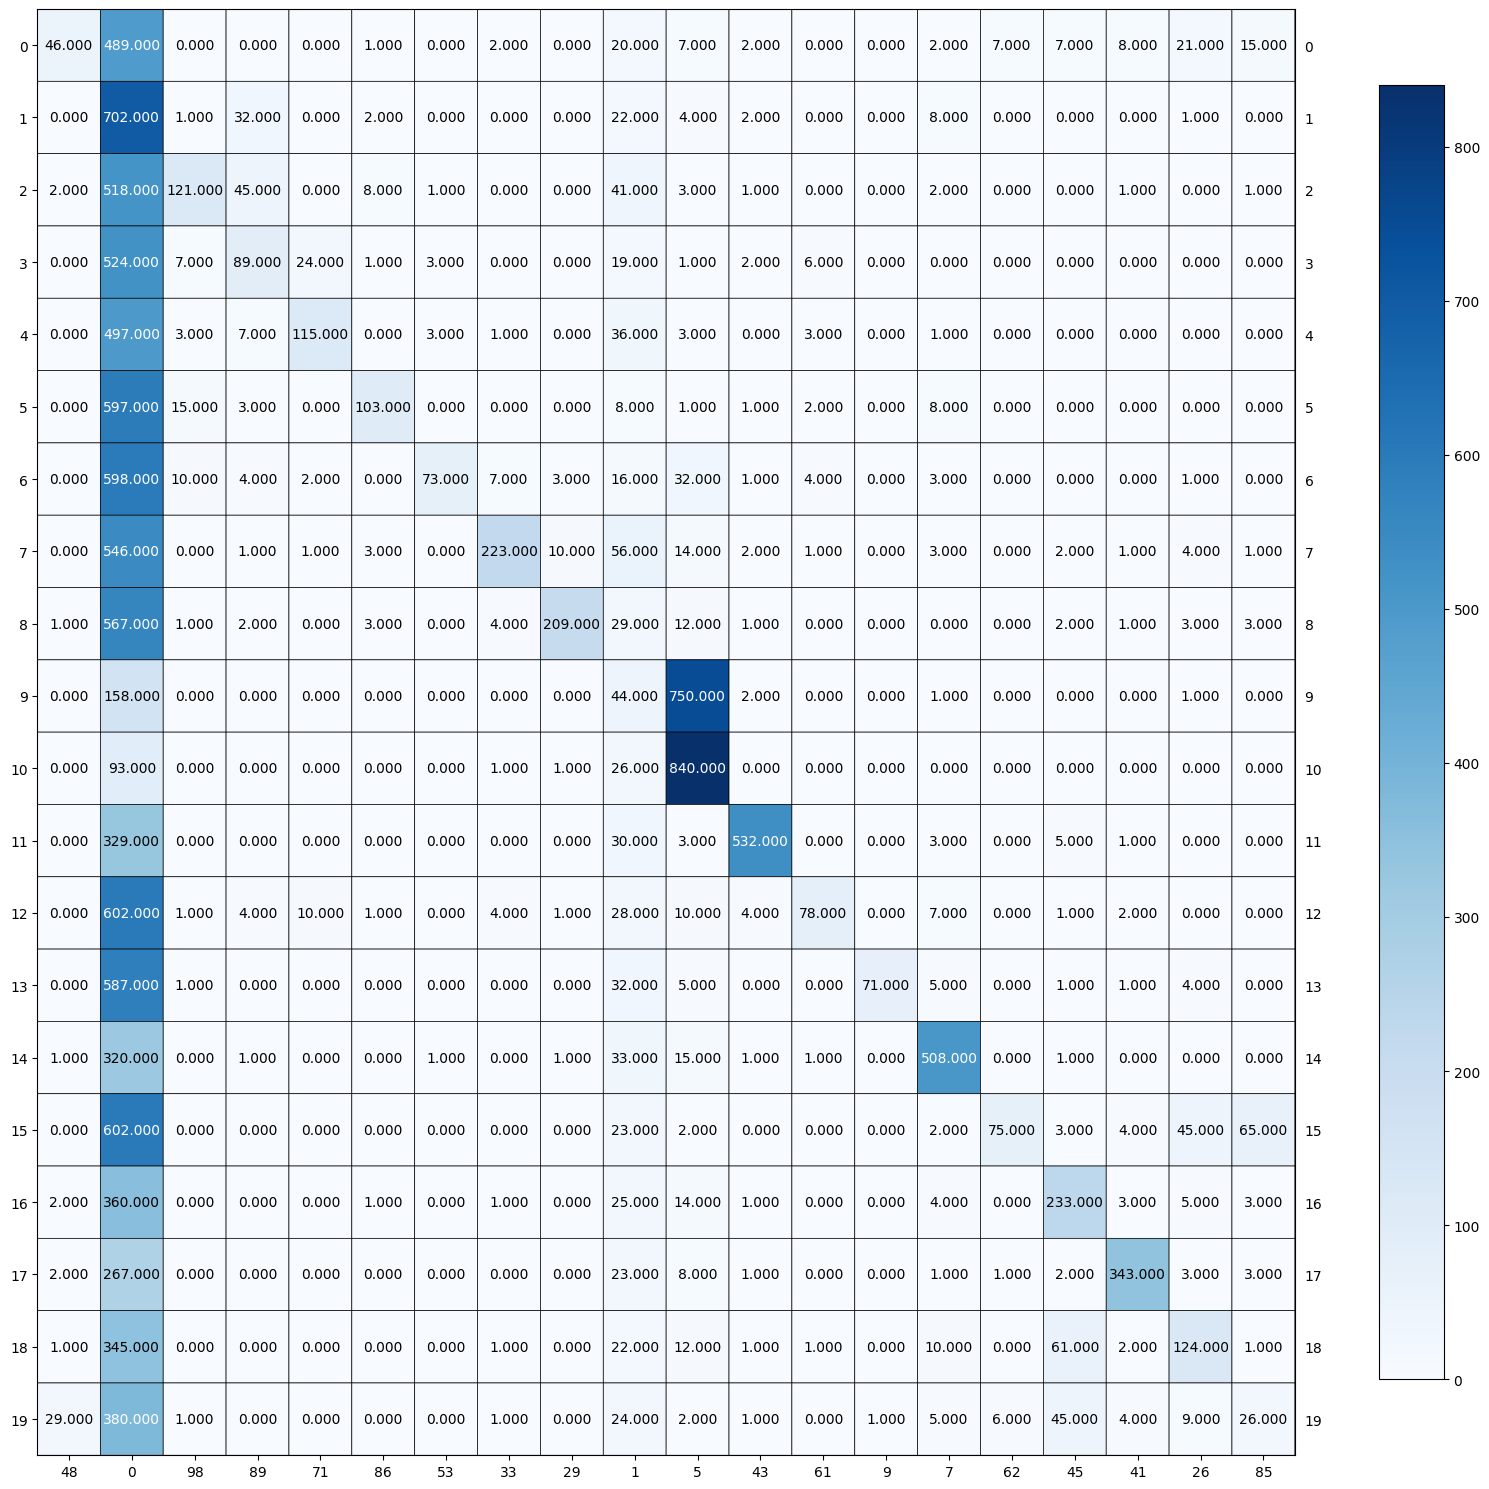

--------------------
homogeneity: 0.33699591545350105
completeness: 0.3772219630222252
v_measure: 0.35597613722340316
adjusted_rand: 0.05263509782516006
adjusted_mutual_info: 0.34320620165647775
--------------------


In [ ]:
from hdbscan import HDBSCAN

# cluster_size=20 gives the best performance regarding v-measure metric
min_cluster_size = [20]
data_umap = umap_reduce_dim(data_tfidf, 20, 'cosine') # umap, n=20, cosine
for x in min_cluster_size:
  print('UMAP, metric:cosine, n_components:',x)
  print('HDBSCAN')
  print('min_cluster_size:20')
  hdb_model = HDBSCAN(min_cluster_size=x)
  pred_label = hdb_model.fit_predict(data_umap)
  eval_metric(true_label, pred_label, 1)

### Q17
There are 54 bins in the plot corresponding to 54 combination. The y-axis is the score of certain ocmbination. <br>
|<---------------reduced_format---------------->|<---------------reduced_format---------------->|<br>
|<---clustering_1-->|...|<--clustering_6-->|<---clustering_1-->|...|<--clustering_6-->|<br>
|<-----------------------6_bins----------------------->|<-----------------------6_bins----------------------->|<br>

We will be comparing V-measure score to determine clustering-compression combination performance since V Measure score is designed to evaluate how successfully the clustering has been performed, considering both homogeneity and completeness of the clusters formed.<br><br>
By oberserving the V-measure plot, the first four clustering on UMAP generally perform better than other clustering-compression combination. Within these four clustering, kmeans_20 done slightly better than others in UMAP_20. In conclusion, the combination of kmeans clustering with n_cluster=20 on UMAP_20 reduction format has the best performance on the given dataset. It makes sense in the way that the given dataset has 20 classes, and kmeans_20 has just the enough n_cluster.

In [ ]:
### dimension reduction types
from sklearn.decomposition import TruncatedSVD, NMF
from umap import UMAP

svd_5 = TruncatedSVD(n_components=5, random_state=0)
svd_20 = TruncatedSVD(n_components=20, random_state=0)
svd_200 = TruncatedSVD(n_components=200, random_state=0)

nmf_5 = NMF(n_components=5, init = 'random', random_state=0, max_iter=500)
nmf_20 = NMF(n_components=20, init = 'random', random_state=0, max_iter=500)
nmf_200 = NMF(n_components=200, init = 'random', random_state=0, max_iter=500)

umap_5 = UMAP(n_components=5, metric='cosine')
umap_20 = UMAP(n_components=20, metric='cosine')
umap_200 = UMAP(n_components=200, metric='cosine')

reducer = [svd_5, svd_20, svd_200, nmf_5, nmf_20, nmf_200, umap_5, umap_20, umap_200]


In [ ]:
# write fit_transform into file
import pickle
reducted_data_file = ["svd_5.pkl", "svd_20.pkl", "svd_200.pkl",
                      "nmf_5.pkl", "nmf_20.pkl", "nmf_200.pkl",
                      "umap_5.pkl", "umap_20.pkl", "umap_200.pkl"]

for i in range(9):
  pickle.dump(reducer[i].fit_transform(data_tfidf), open(reducted_data_file[i], 'wb'))

In [ ]:
# clustering types
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from hdbscan import HDBSCAN

kmeans_10 = KMeans(n_clusters=10,max_iter = 2000, n_init = 60, random_state=0)
kmeans_20 = KMeans(n_clusters=20,max_iter = 2000, n_init = 60, random_state=0)
kmeans_50 = KMeans(n_clusters=50,max_iter = 2000, n_init = 60, random_state=0)

ac_model = AgglomerativeClustering(n_clusters=20, linkage='ward')

hdb_100 = HDBSCAN(min_cluster_size=100)
hdb_200 = HDBSCAN(min_cluster_size=200)

cluster = [kmeans_10, kmeans_20, kmeans_50, ac_model, hdb_100, hdb_200]

In [ ]:
# comparison
# 54 combination
import pickle

reducted_data_file = ["svd_5.pkl", "svd_20.pkl", "svd_200.pkl",
                      "nmf_5.pkl", "nmf_20.pkl", "nmf_200.pkl",
                      "umap_5.pkl", "umap_20.pkl", "umap_200.pkl"]

homo = []
comp = []
v_mea = []
adj_rand = []
adj_mut = []

for x in reducted_data_file:
  reduced_data = pickle.load(open(x, 'rb'))
  print(len(reduced_data))
  for y in cluster:
    print('-'*20)
    print('clustering:', y)
    print('reducer:', x)
    print('-'*20)
    pred_label = y.fit_predict(reduced_data)
    homo.append(homogeneity_score(true_label, pred_label))
    comp.append(completeness_score(true_label, pred_label))
    v_mea.append(v_measure_score(true_label, pred_label))
    adj_rand.append(adjusted_rand_score(true_label, pred_label))
    adj_mut.append(adjusted_mutual_info_score(true_label, pred_label))

18846
--------------------
clustering: KMeans(max_iter=2000, n_clusters=10, n_init=60, random_state=0)
reducer: svd_5.pkl
--------------------
--------------------
clustering: KMeans(max_iter=2000, n_clusters=20, n_init=60, random_state=0)
reducer: svd_5.pkl
--------------------
--------------------
clustering: KMeans(max_iter=2000, n_clusters=50, n_init=60, random_state=0)
reducer: svd_5.pkl
--------------------
--------------------
clustering: AgglomerativeClustering(n_clusters=20)
reducer: svd_5.pkl
--------------------
--------------------
clustering: HDBSCAN(min_cluster_size=100)
reducer: svd_5.pkl
--------------------
--------------------
clustering: HDBSCAN(min_cluster_size=200)
reducer: svd_5.pkl
--------------------
18846
--------------------
clustering: KMeans(max_iter=2000, n_clusters=10, n_init=60, random_state=0)
reducer: svd_20.pkl
--------------------
--------------------
clustering: KMeans(max_iter=2000, n_clusters=20, n_init=60, random_state=0)
reducer: svd_20.pkl
----

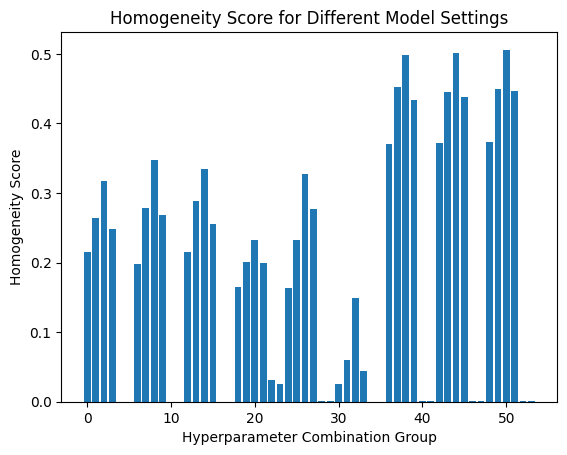

In [ ]:
from matplotlib import pyplot as plt
plt.bar(range(54), homo)
plt.title("Homogeneity Score for Different Model Settings")
plt.xlabel("Hyperparameter Combination Group")
plt.ylabel("Homogeneity Score")
plt.show()

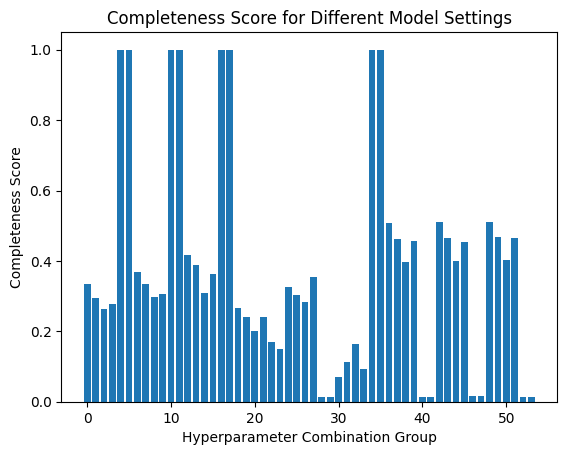

In [ ]:
plt.bar(range(54), comp)
plt.title("Completeness Score for Different Model Settings")
plt.xlabel("Hyperparameter Combination Group")
plt.ylabel("Completeness Score")
plt.show()

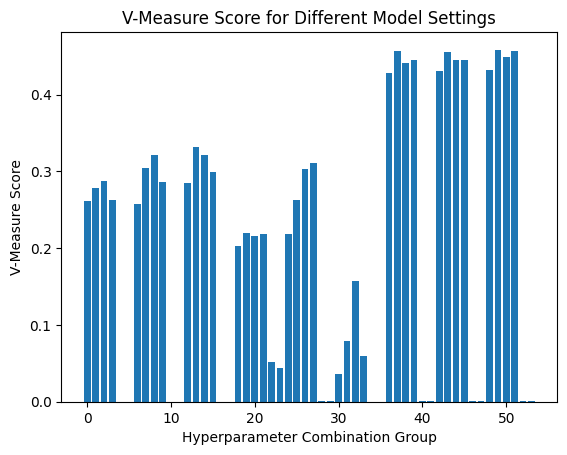

In [ ]:
plt.bar(range(54), v_mea)
plt.title("V-Measure Score for Different Model Settings")
plt.xlabel("Hyperparameter Combination Group")
plt.ylabel("V-Measure Score")
plt.show()

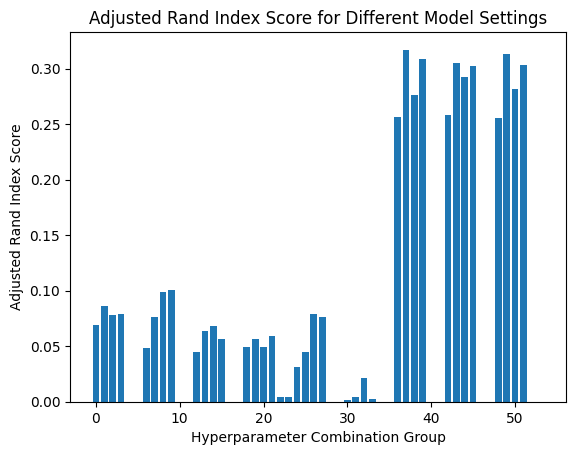

In [ ]:
plt.bar(range(54), adj_rand)
plt.title("Adjusted Rand Index Score for Different Model Settings")
plt.xlabel("Hyperparameter Combination Group")
plt.ylabel("Adjusted Rand Index Score")
plt.show()

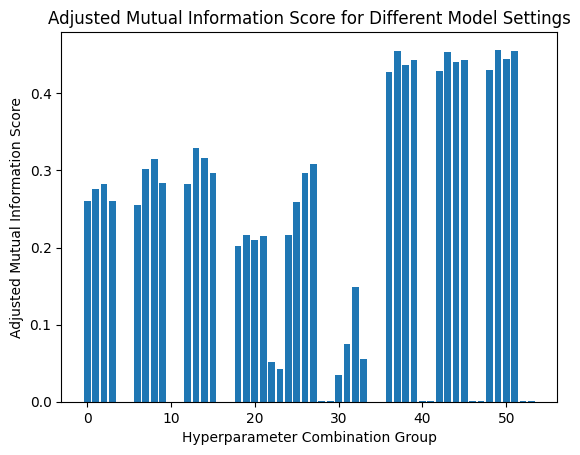

In [ ]:
plt.bar(range(54), adj_mut)
plt.title("Adjusted Mutual Information Score for Different Model Settings")
plt.xlabel("Hyperparameter Combination Group")
plt.ylabel("Adjusted Mutual Information Score")
plt.show()

### Q18
UMAP uses cosine distances to compare representations while Kmeans distance metric is the Euclidean distance. Intuitively, I can apply a cosine clustering method to align with UMAP or the other way around. Since UMAP has been shown outstanding in dimension reduction in the previous plot, I will experiment a Kmenas-like cosine metric clustering, and compare v-measure score with the combinaiton of UMAP_20 and Kmenas_20.


# Part 2 - Deep Learning and Clustering of Image Data

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

## Q19 Transferring VGG network's pretraining such that it remains useful for a custom dataset

Even though the VGG network is trained on a dataset with totally different classes as targets, the features derived from this network allows us to do a fairly good job at classifying the images in the different, more specialized dataset we're working with.

The reason this is possible is because VGGs work by extracting features that inform us about image characteristics such as edges, textures, colors, shapes, geometric structures, and scene, which are all highly generalizable and not unique to just one particular dataset. Then, the VGG can use the patterns that it learned to recognize and discriminate between different classes. Even if the model learns these features from a different dataset, the training can still be informative and discriminative for a new dataset, as even the new dataset will have these types of features and structures that can be recognized and discriminated between. Since the initial training is done on ImageNet, the VGG is exposed to a highly general and diverse set of images, and it can learn a lot about the structures present in a diverse set of given images, much of which will still be relevant and transferable when applied to a different, perhaps more specific dataset. By collecting these highly general patterns, VGGs can train on one dataset and perform reasonably well on another, even if the classes are different, as it looks for the core characteristics of an image, regardless of the classes belonging to the dataset.

## Q20 Helper Code Feature Extraction

The helper code first creates a class named FeatureExtractor using the nn.Module class as its super class. This FeatureExtractor class is essentially a Neural Network that will take in images of the flowers we are working with in the dataset as input, and then return a feature vector as output. This feature vector will not only be of lower-dimension so that we can perform minimal computations, but it will also capture the most relevant and meaningful characteristics of the images in order to enable downstream discrimination of classes.

In this FeatureExtractor neural network, as shown in its forward function, by extracting the VGG-16 feature layers and average pooling layer, and then converting the image to a one-dimensional vector and then taking only the first part of the fully-connected layer from VGG16, we are able to extract just a useful set of features from the pretrained VGG16, rather than an actual classification, and then use this set of expert features to perform classification on our new dataset, which has different classes compared to the dataset that the VGG was trained on, but the expert features identified are still meaningful for working with this new dataset and classes.

Once this has been set up, all we have to do is go through our flower images (perhaps after some normalizing transformations have been applied to them), passing in each image to this feature extractor neural network and storing the output feature vectors to a numpy 2D array called f_all where each row corresponds to one of the flower samples, and the columns represent the extracted features from the sample. The numpy 1D array called y_all is simply set to contain the ground truth labels for each flower sample.

Then, f_all and y_all can be used in future steps to perform efficient and effective classification tasks as well as evaluate performance metrics.

In [ ]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

## Q21 Dimensionality Reduction Through Feature Extraction

In the unprocessed tf_flowers dataset, each image has variable pixel height and variable pixel width. Therefore, we first apply some transforms to each image using PyTorch's transforms.Compose() function. Particularly, after transforms.Resize(224) and transforms.CenterCrop(224) have been applied, each image has ***a height of 224 pixels and a width of 224 pixels***. By multiplying these values together, we know that each image in the dataset will then have ***50,176 pixels***, which is a lot of values to work with, plus they may not be as informative as we'd like.

Therefore, we pass in the images to the FeatureExtractor, which gives us a feature vector for each image sample. For each of the 3,670 image samples in our dataset, we then have a feature vector of ***length 4096***. Therefore, the ***VGG network extracts 4096 features per image***.

In [ ]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]
print(num_features)

(3670, 4096) (3670,)
4096


## Q22 Density of Extracted Features

The extracted features are ***dense***. In fact, if we go through every extracted feature of every image sample, we will fail to find any zero elements. This makes sense because our VGG network converted the images to feature vectors that represented only the most relevant features, thereby eliminating unhelpful and excessive zero values that don't aid us in discriminating between the classes.

On the other hand, sparse TF-IDF features in text are comprised of vectors containing many zeros, because you are checking for MANY terms in each document, many of which are not present in a given document. In other words, any given document will only contain a small part of the total vocabulary, where the total vocabulary is large because it has to account for all meaningful terms that appear accross all documents.

In [ ]:
num_zeros = 0
for sample in f_all:
  for feature in sample:
    if feature == 0.0:
      num_zeros += 1
print(num_zeros)

0


## Q23 Using t-SNE to Inspect High-Dimensional Features

When comparing the PCA visualization below with t-SNE, we see that performing dimsensionality reduction with t-SNE ***definitely allows us to better separate the classes*** when number of components is set to 2. This is likely due to the non-linear nature of t-SNE, allowing us to find more complicated patterns in the data.

However, even with t-SNE using 2 components, we run into some trouble, as there is ***no clear distinction between the yellow class and turquoise class in the plot***.

Overall, t-SNE seems to be the better option between the two if we want to optimize for discriminative capabilities between the classes.


Text(0, 0.5, 'PCA Component 2')

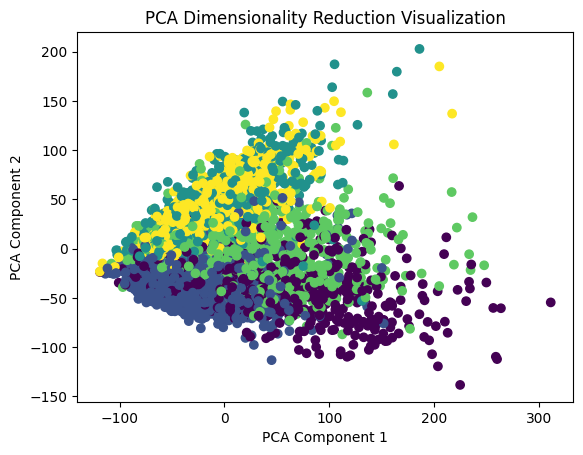

In [ ]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)
plt.title('PCA Dimensionality Reduction Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

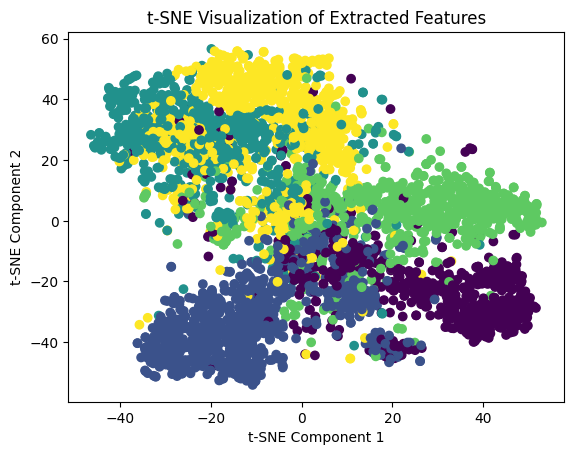

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
f_tsne = tsne.fit_transform(f_all)
plt.scatter(*f_tsne.T, c=y_all)
plt.title('t-SNE Visualization of Extracted Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Q24 Computing Best Dimensionality Reduction and Clustering Method

We were able to achieve the best rand score of ***0.8216134444045887*** using the ***K-Means clustering*** algorithm combined with ***UMAP with n_components=50*** for dimensionality reduction. The rand scores that resulted from each combination of clustering and dimensionality reduction are displayed below.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN

print("No Dimensionality Reduction")

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=30, random_state=0)
pred_labels = kmeans.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("KMeans:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred_labels = ac_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Ward:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='single')
pred_labels = ac_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Single:", score)

No Dimensionality Reduction
KMeans: 0.7022422936704386
Agglomerative Clustering Ward: 0.7104411881564593
Agglomerative Clustering Single: 0.20495646936591502


In [ ]:
!pip install hdbscan

In [ ]:
from hdbscan import HDBSCAN

print("No Dimensionality Reduction")

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=100:", score)

No Dimensionality Reduction
HDBSCAN, min_cluster_size=20, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=20, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=100: 0.20358404572368982


In [ ]:
svd = TruncatedSVD(n_components=50, random_state=0)
f_all_svd = svd.fit_transform(f_all)

In [ ]:
print("SVD with n_components=50 Dimensionality Reduction")
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=30, random_state=0)
pred_labels = kmeans.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("KMeans:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred_labels = ac_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Ward:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='single')
pred_labels = ac_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Single:", score)

SVD with n_components=50 Dimensionality Reduction
KMeans: 0.7031995740139604
Agglomerative Clustering Ward: 0.7118473282669513
Agglomerative Clustering Single: 0.2052172892702167


In [ ]:
print("SVD with n_components=50 Dimensionality Reduction")

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_svd)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=100:", score)

SVD with n_components=50 Dimensionality Reduction
HDBSCAN, min_cluster_size=20, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=20, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=100: 0.20358404572368982


In [ ]:
!pip install umap-learn

In [ ]:
from umap import UMAP

umap_model = UMAP(n_components=50, metric='cosine')
f_all_umap = umap_model.fit_transform(f_all)

In [ ]:
print("UMAP with n_components=50 Dimensionality Reduction")
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=30, random_state=0)
pred_labels = kmeans.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("KMeans:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred_labels = ac_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Ward:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='single')
pred_labels = ac_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Single:", score)

UMAP with n_components=50 Dimensionality Reduction
KMeans: 0.8216134444045887
Agglomerative Clustering Ward: 0.8155021488678619
Agglomerative Clustering Single: 0.4297416382787372


In [ ]:
print("UMAP with n_components=50 Dimensionality Reduction")

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_umap)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=100:", score)

UMAP with n_components=50 Dimensionality Reduction
HDBSCAN, min_cluster_size=20, min_samples=50: 0.42840159432850383
HDBSCAN, min_cluster_size=100, min_samples=50: 0.42840159432850383
HDBSCAN, min_cluster_size=200, min_samples=50: 0.42840159432850383
HDBSCAN, min_cluster_size=20, min_samples=100: 0.42840159432850383
HDBSCAN, min_cluster_size=100, min_samples=100: 0.42840159432850383
HDBSCAN, min_cluster_size=200, min_samples=100: 0.42840159432850383


In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None

    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))

    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self

    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

In [ ]:
f_all_auto = Autoencoder(50).fit_transform(f_all)

100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


In [ ]:
print("Autoencoder with n_components=50 Dimensionality Reduction")
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=30, random_state=0)
pred_labels = kmeans.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("KMeans:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred_labels = ac_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Ward:", score)

ac_model = AgglomerativeClustering(n_clusters=5, linkage='single')
pred_labels = ac_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("Agglomerative Clustering Single:", score)

Autoencoder with n_components=50 Dimensionality Reduction
KMeans: 0.7029779662137223
Agglomerative Clustering Ward: 0.7368867817333978
Agglomerative Clustering Single: 0.20493864568224976


In [ ]:
print("Autoencoder with n_components=50 Dimensionality Reduction")

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=50)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=50:", score)

hdb_model = HDBSCAN(min_cluster_size=20, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=20, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=100, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=100, min_samples=100:", score)

hdb_model = HDBSCAN(min_cluster_size=200, min_samples=100)
pred_labels = hdb_model.fit_predict(f_all_auto)
score = rand_score(y_all, pred_labels)
print("HDBSCAN, min_cluster_size=200, min_samples=100:", score)

Autoencoder with n_components=50 Dimensionality Reduction
HDBSCAN, min_cluster_size=20, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=50: 0.20358404572368982
HDBSCAN, min_cluster_size=20, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=100, min_samples=100: 0.20358404572368982
HDBSCAN, min_cluster_size=200, min_samples=100: 0.20358404572368982


## Q25

After splitting the data into a training and test set, we evaluated the performance of the MLP classifier.

First, the test accuracy of the MLP classifier on the original VGG features was quite high: ***90.054%***

For UMAP with n_components=50 dimensionality reduction, the test accuracy of the MLP classifier was: ***84.060%***

For Autoencoder with n_components=50 dimensionality reduction, the test accuracy of the MLP classifier was: ***85.559%***

This tells us that the performance of the model ***does suffer with the reduced-dimension representations***, however the difference is ***not too significant.***

The success in classification makes sense in the context of clustering results obtained earlier, because we were able to make use of dimensionality reduction paired with clustering algorithms to effectively group the data into distinct clusters, indicating that discrimination between classes is possible using the given VGG features, and thus a well-designed classifier should also be able to work well with these feature vectors and their corresponding labels, when performing the classification task.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.2, random_state=42)

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True),
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()


    def forward(self, X):
        return self.model(X)

    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                X_ = X_.cuda()
                optimizer.zero_grad()
                output = self.model(X_)
                loss = criterion(output, y_)
                loss.backward()
                optimizer.step()
        return self

    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')
        correct = 0
        total = 0
        self.model.eval()
        with torch.no_grad():
            output = self.model(X_test)
            _, predicted = torch.max(output, 1)
            correct = (predicted == y_test).sum().item()
            total = len(y_test)
        accuracy = correct / total
        return accuracy

In [ ]:
mlp = MLP(4096)
mlp.train(X_train, y_train)
accuracy = mlp.eval(X_test, y_test)
print()
print(accuracy)

100%|██████████| 100/100 [00:07<00:00, 13.33it/s]



0.9005449591280654


In [ ]:
umap_model = UMAP(n_components=50, metric='cosine')
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

In [ ]:
auto_model = Autoencoder(50)
X_train_auto = auto_model.fit_transform(X_train)
X_test_auto = auto_model.transform(X_test)

100%|██████████| 100/100 [00:14<00:00,  6.76it/s]


In [ ]:
mlp = MLP(50)
mlp.train(X_train_umap, y_train)
accuracy = mlp.eval(X_test_umap, y_test)
print()
print("UMAP Accuracy:", accuracy)

mlp = MLP(50)
mlp.train(X_train_auto, y_train)
accuracy = mlp.eval(X_test_auto, y_test)
print()
print("Autoencoder Accuracy:", accuracy)

100%|██████████| 100/100 [00:09<00:00, 10.12it/s]



UMAP Accuracy: 0.8228882833787466


100%|██████████| 100/100 [00:17<00:00,  5.69it/s]


Autoencoder Accuracy: 0.8501362397820164


# Part 3 - Clustering using both image and text

In [ ]:
!pip install datasets transformers numpy pandas Pillow matplotlib
!pip install torch tqdm scipy
!pip install git+https://github.com/openai/CLIP.git
!pip install plotly umap-learn

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ks4r17vi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ks4r17vi
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [ ]:
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import clip
import torch
from tqdm import tqdm
from scipy.special import softmax
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# load csv file and image paths to construct pokedex, use type_to_load=None to load all types, else use a list of types 1 to load
def construct_pokedex(csv_path='/content/drive/Shareddrives/ECE219/Project2/Pokemon.csv', image_dir='/content/drive/Shareddrives/ECE219/Project2/images', type_to_load=None):
    pokedex = pd.read_csv(csv_path)
    image_paths = []

    for pokemon_name in pokedex["Name"]:
        imgs = glob(f"{image_dir}/{pokemon_name}/0.jpg")
        if len(imgs) > 0:
            image_paths.append(imgs[0])
        else:
            image_paths.append(None)

    pokedex["image_path"] = image_paths
    pokedex = pokedex[pokedex["image_path"].notna()].reset_index(drop=True)

    # only keep pokemon with distinct id
    ids, id_counts = np.unique(pokedex["ID"], return_counts=True)
    ids, id_counts = np.array(ids), np.array(id_counts)
    keep_ids = ids[id_counts == 1]

    pokedex = pokedex[pokedex["ID"].isin(keep_ids)].reset_index(drop=True)
    pokedex["Type2"] = pokedex["Type2"].str.strip()
    if type_to_load is not None:
        pokedex = pokedex[pokedex["Type1"].isin(type_to_load)].reset_index(drop=True)
    return pokedex

# load clip model
def load_clip_model():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-L/14", device=device)
    return model, preprocess, device

# inference clip model on a list of image path
def clip_inference_image(model, preprocess, image_paths, device):
    image_embeddings = []
    with torch.no_grad():
        for img_path in tqdm(image_paths):
            img = Image.open(img_path)
            img_preprocessed = preprocess(img).unsqueeze(0).to(device)
            image_embedding = model.encode_image(img_preprocessed).detach().cpu().numpy()
            image_embeddings += [image_embedding]

    image_embeddings = np.concatenate(image_embeddings, axis=0)
    image_embeddings /= np.linalg.norm(image_embeddings, axis=-1, keepdims=True)
    return image_embeddings

# inference clip model on a list of texts
def clip_inference_text(model, preprocess, texts, device):
    with torch.no_grad():
        text_embeddings = model.encode_text(clip.tokenize(texts).to(device)).detach().cpu().numpy()
    text_embeddings /= np.linalg.norm(text_embeddings, axis=-1, keepdims=True)
    return text_embeddings

# compute similarity of texts to each image
def compute_similarity_text_to_image(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=0)
    return similarity

# compute similarity of iamges to each text
def compute_similarity_image_to_text(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=-1)
    return similarity

# Use TSNE to project CLIP embeddings to 2D space
def umap_projection(image_embeddings, n_neighbors=15, min_dist=0.1, metric='cosine'):
    distance_matrix = np.zeros((image_embeddings.shape[0], image_embeddings.shape[0]))
    for i in range(image_embeddings.shape[0]):
        for j in range(image_embeddings.shape[0]):
            if i == j:
                distance_matrix[i, j] = 1
            else:
                distance_matrix[i, j] = np.dot(image_embeddings[i], image_embeddings[j])
    distance_matrix = 1 - distance_matrix
    reducer = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
    visualization_data = reducer.fit_transform(distance_matrix)
    return visualization_data

## Q26 Text Queries Regarding Pokemon Types

The templete we ended up choosing for text queries was: (Name_of_Type) Type Pokemon where (Name_of_Type) is Bug, Fire, Grass, Dark, etc.

The pokemon plots for the text queries are given below. These queries actually turned out to be quite effective, as we can see that each query mostly brought up Pokemon of the correct type. This was especially true for the query "Fire Type Pokemon" and "Bug Type Pokemon", where all relevant Pokemon generated happened to be of Fire or Bug type, respectively. However, the queries "Dark Type Pokemon" and "Dragon Type Pokemon" did not work as well. While still fairly effective, they generated a few relevant Pokemon that actually belonged to other types. This is somewhat understandable though, because the algorithm likely prioritized for Dark color schemes, and did the best it could without having access to the actual type of each Pokemon image. In a similar manner, there were a couple non-Dragon type pokemon that were mistaken as Dragon Type, but this also understandable as the shape of these Pokemon look as if they would be Dragon type, even if their actual type doesn't reflect this.

In [ ]:
pokedex = construct_pokedex()

In [ ]:
model, preprocess, device = load_clip_model()

image_embeddings = clip_inference_image(model, preprocess, pokedex["image_path"], device)
print(image_embeddings.shape)

100%|██████████| 754/754 [00:32<00:00, 23.53it/s]

(754, 768)


In [ ]:
text_embeddings_bug = clip_inference_text(model, preprocess, ["Bug Type Pokemon"], device)
print(text_embeddings_bug.shape)
text_embeddings_fire = clip_inference_text(model, preprocess, ["Fire Type Pokemon"], device)
text_embeddings_grass = clip_inference_text(model, preprocess, ["Grass Type Pokemon"], device)
text_embeddings_dark = clip_inference_text(model, preprocess, ["Dark Type Pokemon"], device)
text_embeddings_dragon = clip_inference_text(model, preprocess, ["Dragon Type Pokemon"], device)

(1, 768)


In [ ]:
similarity_bug = compute_similarity_text_to_image(image_embeddings, text_embeddings_bug)
similarity_fire = compute_similarity_text_to_image(image_embeddings, text_embeddings_fire)
similarity_grass = compute_similarity_text_to_image(image_embeddings, text_embeddings_grass)
similarity_dark = compute_similarity_text_to_image(image_embeddings, text_embeddings_dark)
similarity_dragon = compute_similarity_text_to_image(image_embeddings, text_embeddings_dragon)
similarity_bug = similarity_bug.flatten()
similarity_fire = similarity_fire.flatten()
similarity_grass = similarity_grass.flatten()
similarity_dark = similarity_dark.flatten()
similarity_dragon = similarity_dragon.flatten()


In [ ]:
top_pokemon_bug = np.argsort(similarity_bug)[-5:]
top_pokemon_fire = np.argsort(similarity_fire)[-5:]
top_pokemon_grass = np.argsort(similarity_grass)[-5:]
top_pokemon_dark = np.argsort(similarity_dark)[-5:]
top_pokemon_dragon = np.argsort(similarity_dragon)[-5:]

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_pokemon(top_pokemon, pokemon_type):
  pokemon_images = []
  pokemon_names = []
  pokemon_types = []
  for pokemon in top_pokemon:
    pokemon_images.append(pokedex["image_path"][pokemon])
    pokemon_names.append(pokedex["Name"][pokemon])
    pokemon_types.append((pokedex["Type1"][pokemon], pokedex["Type2"][pokemon]))

  fig, axes = plt.subplots(1, 5, figsize=(20, 5))
  for i, (image_path, name, types) in enumerate(zip(pokemon_images, pokemon_names, pokemon_types)):
      ax = axes[i]
      image = Image.open(image_path)
      ax.imshow(image)
      ax.axis('off')
      ax.set_title(f"{name}\n{types[0]}, {types[1]}")
  plt.suptitle(f"Text Query: {pokemon_type} Type Pokemon", fontsize=15)
  plt.show()

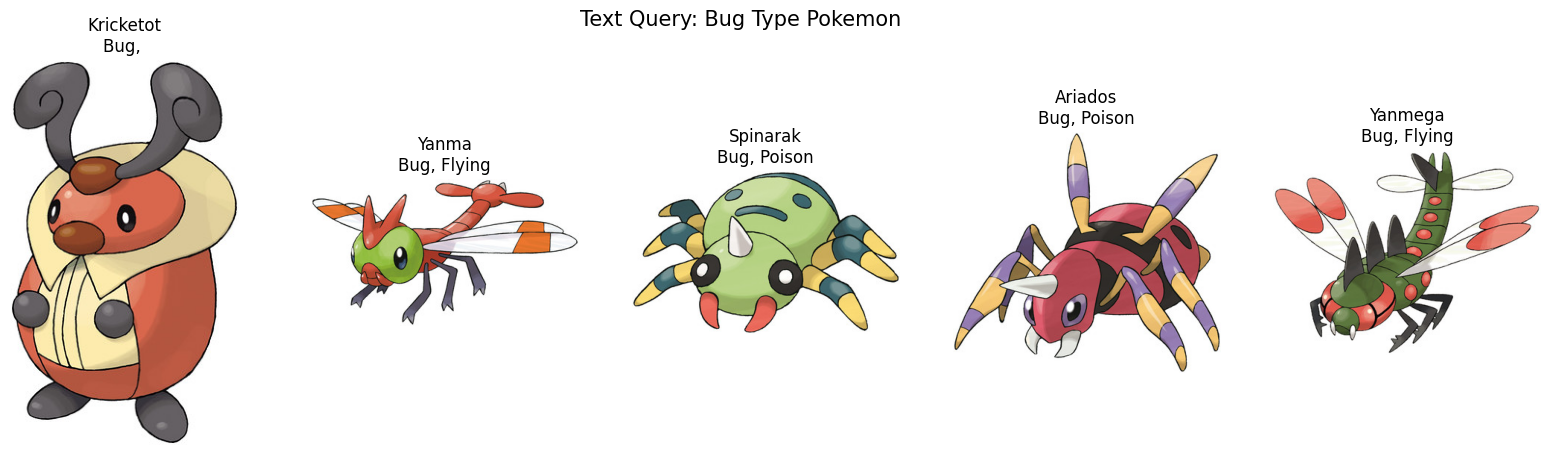

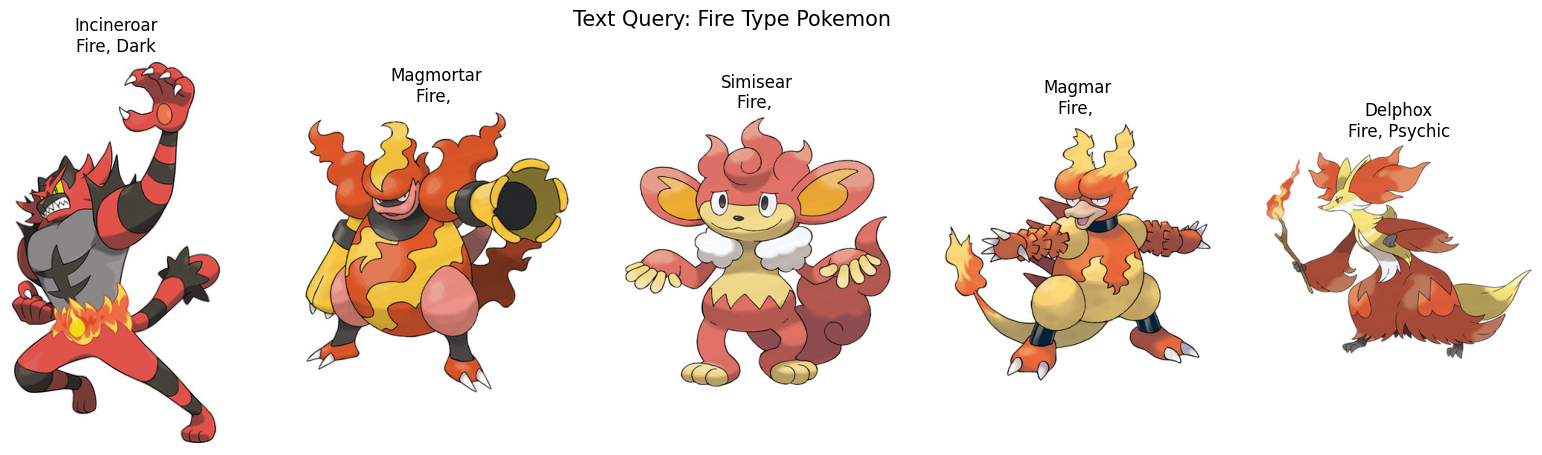

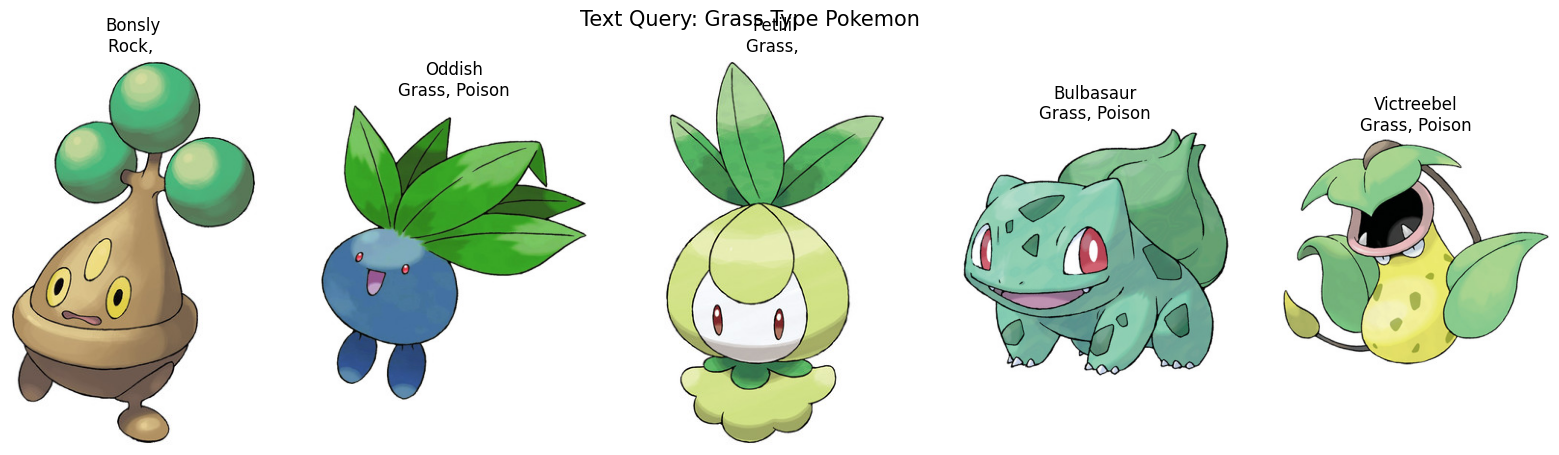

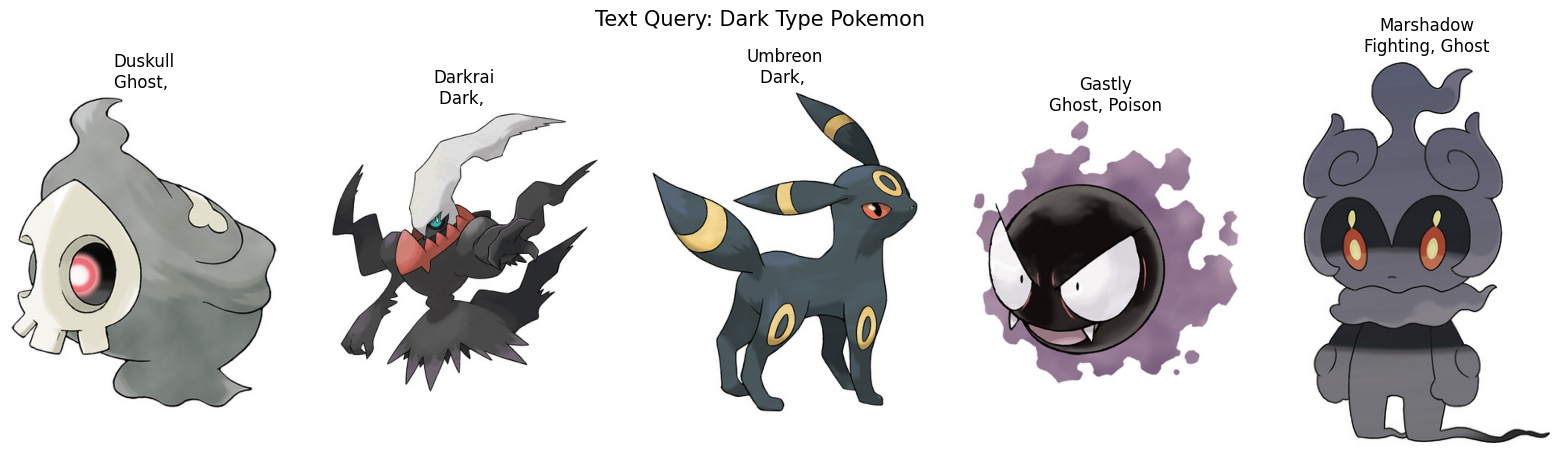

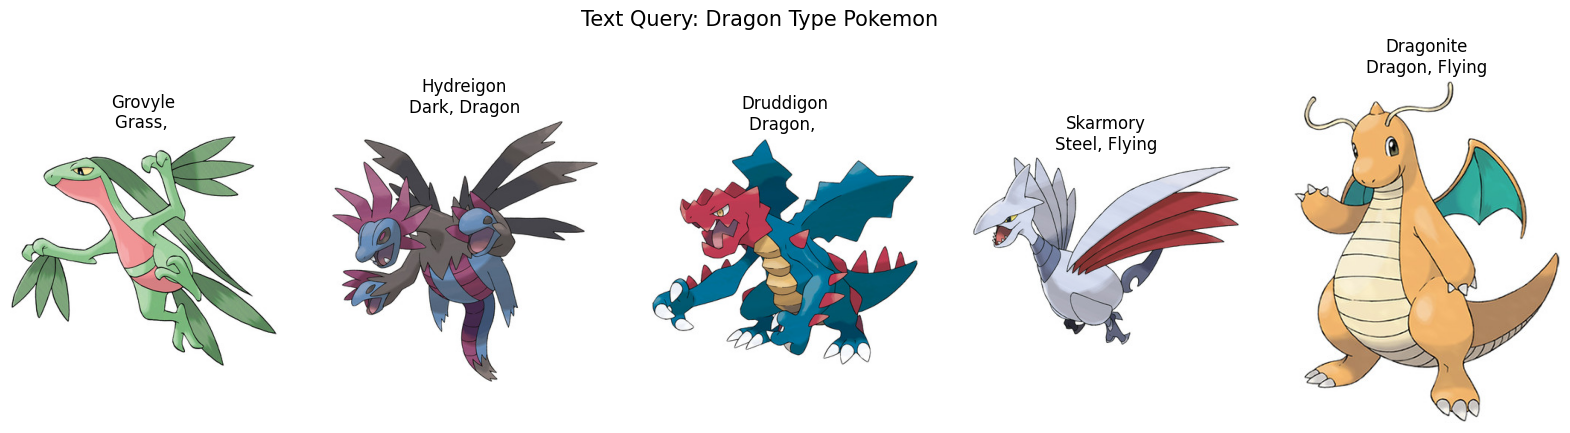

In [ ]:
plot_pokemon(top_pokemon_bug, "Bug")
plot_pokemon(top_pokemon_fire, "Fire")
plot_pokemon(top_pokemon_grass, "Grass")
plot_pokemon(top_pokemon_dark, "Dark")
plot_pokemon(top_pokemon_dragon, "Dragon")

## Q27 Finding Most Relevant Types for 10 Pokemon

The plot of 10 randomly selected Pokemon, along with their 5 most relevant Types (and their probabilities) according to our model, are displayed below.

In [ ]:
unique_types = pokedex["Type1"].unique()
type_template = []
for pokemon_type in unique_types:
  type_template.append(f"{pokemon_type} Type Pokemon")

In [ ]:
model, preprocess, device = load_clip_model()

text_embeddings = clip_inference_text(model, preprocess, type_template, device)
print(text_embeddings.shape)

(18, 768)


100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


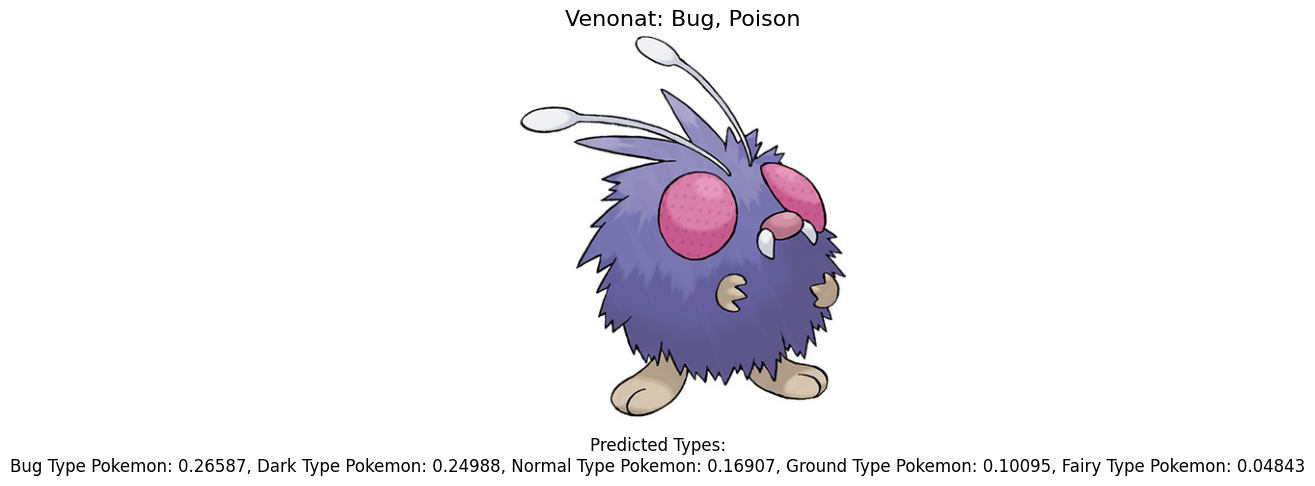

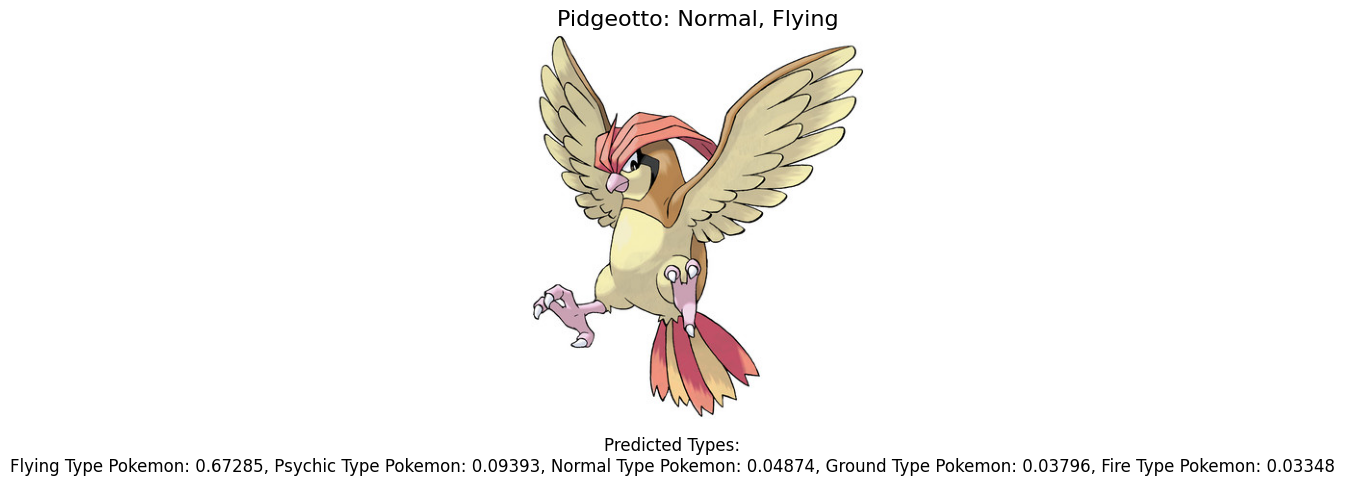

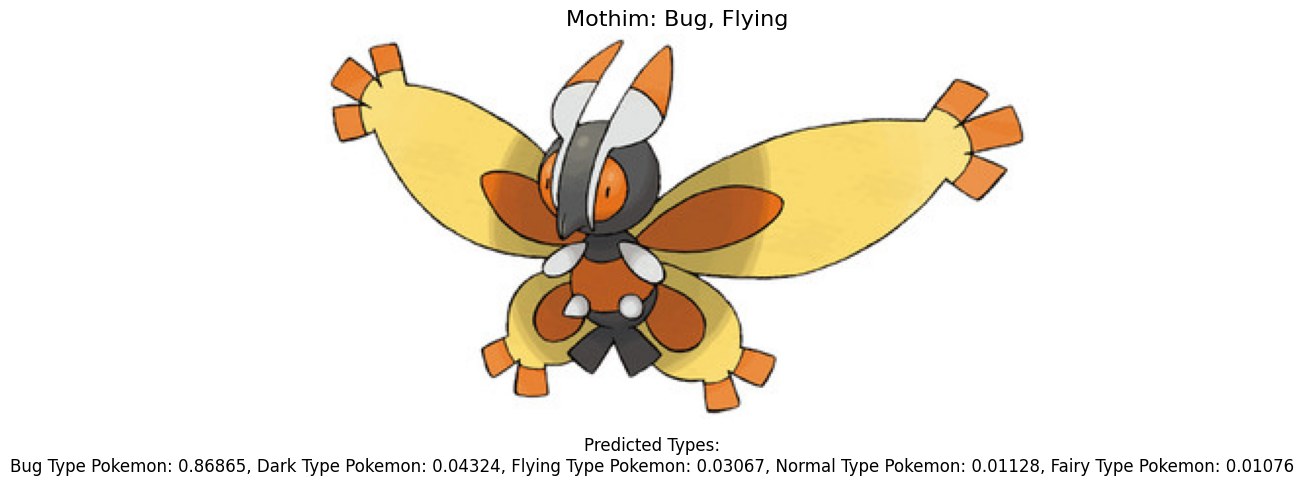

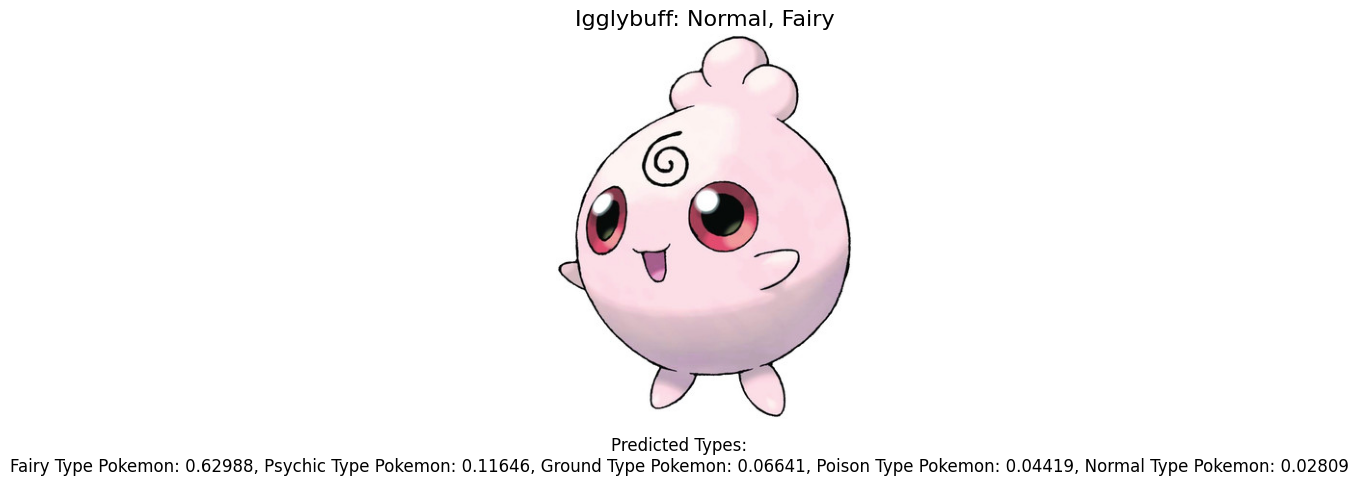

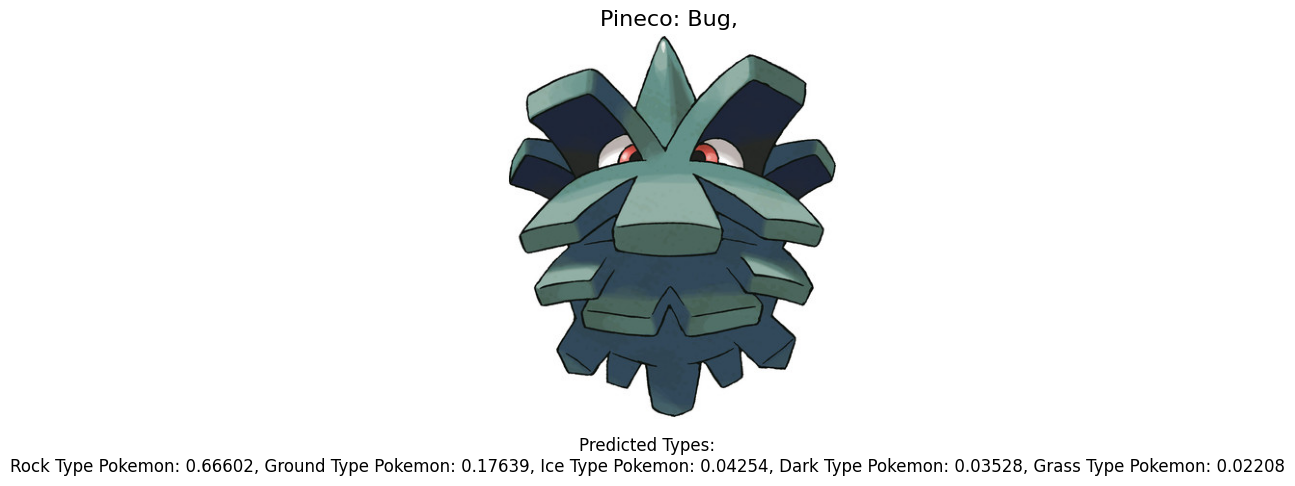

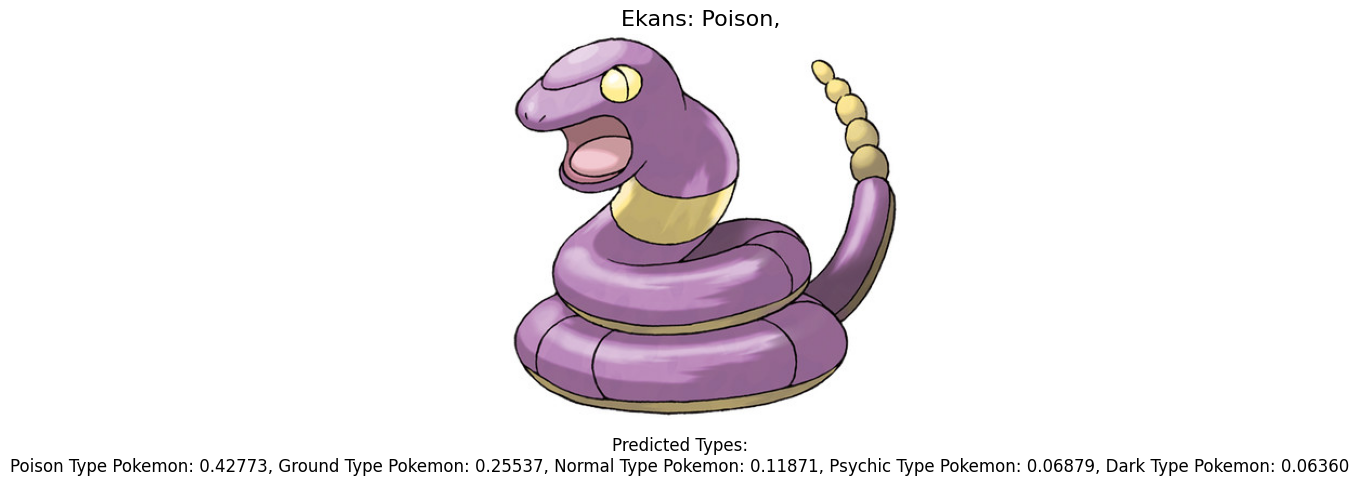

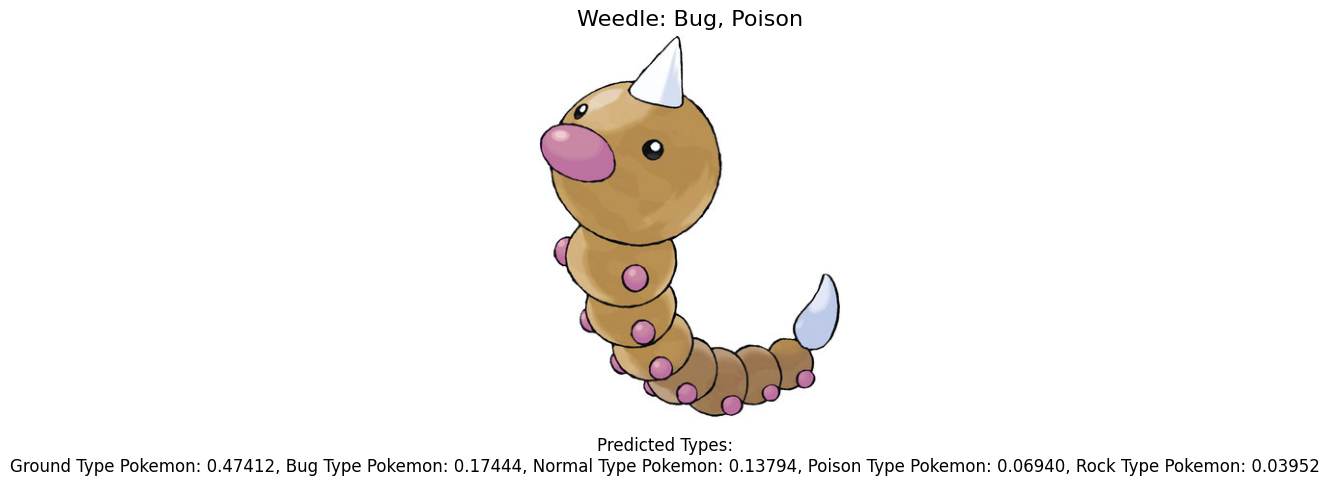

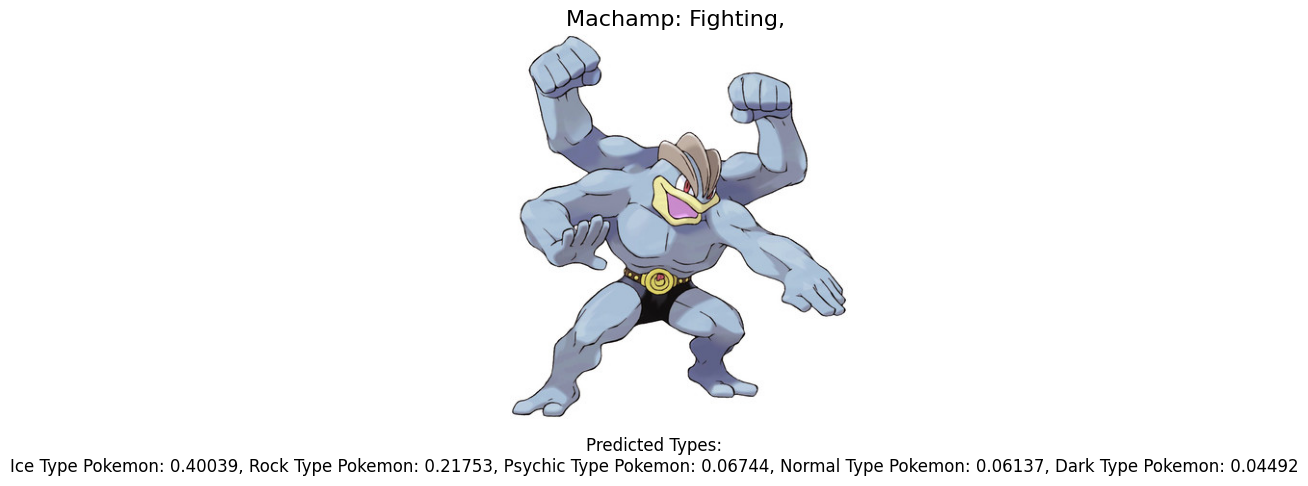

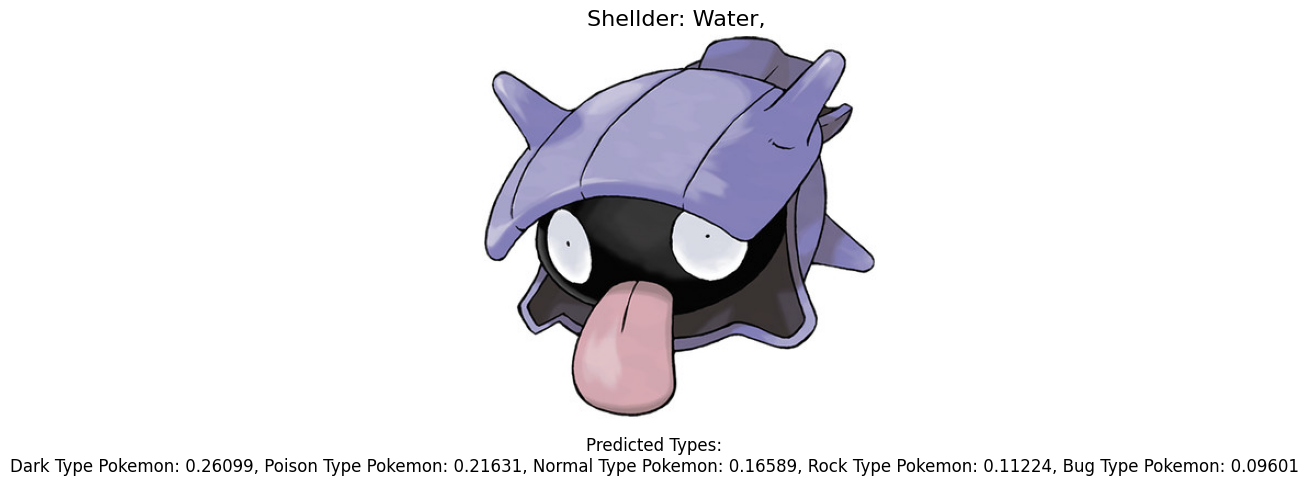

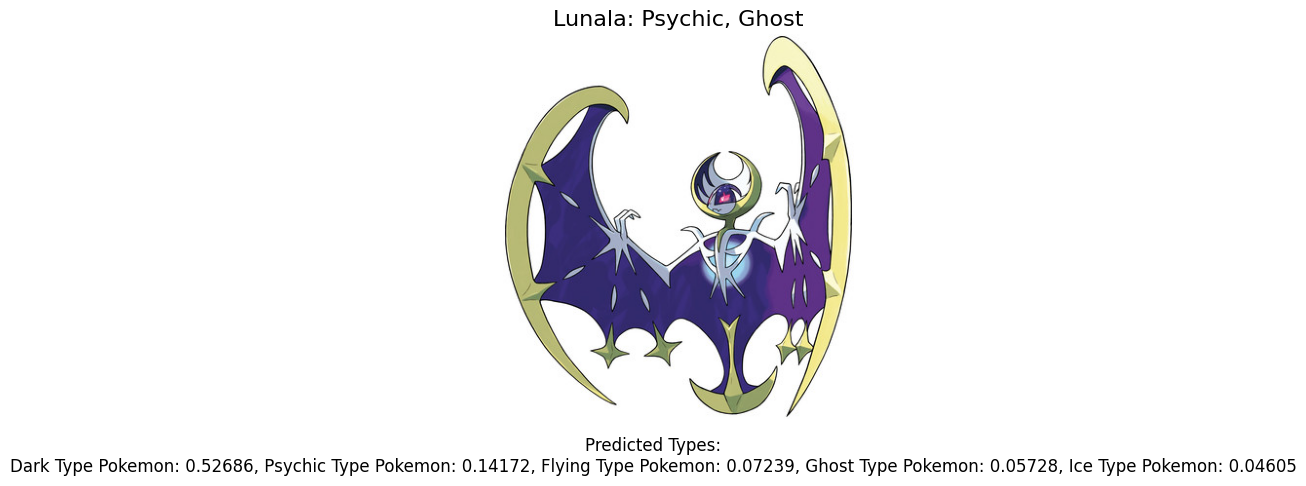

In [ ]:
pokemon1 = 32
pokemon2 = 12
pokemon3 = 324
pokemon4 = 123
pokemon5 = 150
pokemon6 = 15
pokemon7 = 9
pokemon8 = 45
pokemon9 = 57
pokemon10 = 657

pokemon_list = [pokemon1, pokemon2, pokemon3, pokemon4, pokemon5, pokemon6, pokemon7, pokemon8, pokemon9, pokemon10]
top_types_list = [None for _ in range(10)]
top_types_probabilities_list = [None for _ in range(10)]
for i, pokemon in enumerate(pokemon_list):
  image_embeddings = clip_inference_image(model, preprocess, [pokedex["image_path"][pokemon]], device)
  similarity = compute_similarity_image_to_text(image_embeddings, text_embeddings)
  similarity = similarity.flatten()
  top_types = np.argsort(similarity)[-5:]
  top_types = top_types[::-1]
  top_types_probabilities = similarity[top_types]
  top_types_list[i] = top_types
  top_types_probabilities_list[i] = top_types_probabilities

def plot_pokemon2(top_types, top_types_probabilities, pokemon):
  pokemon_name = pokedex["Name"][pokemon]
  pokemon_image = pokedex["image_path"][pokemon]
  pokemon_types = (pokedex["Type1"][pokemon], pokedex["Type2"][pokemon])
  plt.figure(figsize=(20, 5))
  image = Image.open(pokemon_image)
  plt.imshow(image)
  plt.axis('off')
  plt.title(f'{pokemon_name}: {pokemon_types[0]}, {pokemon_types[1]}', fontsize=16)
  caption = f'Predicted Types:\n{type_template[top_types[0]]}: {top_types_probabilities[0]:.5f}, {type_template[top_types[1]]}: {top_types_probabilities[1]:.5f}, {type_template[top_types[2]]}: {top_types_probabilities[2]:.5f}, {type_template[top_types[3]]}: {top_types_probabilities[3]:.5f}, {type_template[top_types[4]]}: {top_types_probabilities[4]:.5f}'
  plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
  plt.show()

for i, pokemon in enumerate(pokemon_list):
  plot_pokemon2(top_types_list[i], top_types_probabilities_list[i], pokemon)



## Q28 Using t-SNE to Visualize Image Clusters

After creating a new Pokedex that included only Bug, Fire, and Grass types (Type 1), we constructed a t-SNE plot of the data with the help of the plotly library to visualize image clusters for these Pokemon types. The points are color coded according to their Type 1, and you can hover over data points to view the Pokemon name, types, and t-SNE component values.

The clustering of Pokemon types through t-SNE does make some intuitive sense, as there is a fair amount of separation between the clusters, enough so that if a new unlabeled datapoint was placed on the graph, we could likely associate it with a particular clustered based on its t-SNE component values. However, I did expect there to be more similarity between the Bug Type and Grass Type clusters, since they both tend to follow a predominantly green color scheme, and can sometimes be confused with each other. On the other hand, Fire Type Pokemon are much more distinct, as they can be identified through their predominately orange color scheme and flames. However, on the t-SNE scatter plot, we actually see the Fire type cluster right in between the Bug and Grass type clusters. Thus, interestingly the separation between Grass and Bug types is larger and clearer than that between Fire and Grass types or Fire and Bug types.

In [ ]:
pokedex2 = construct_pokedex(type_to_load=["Bug", "Fire", "Grass"])

In [ ]:
model, preprocess, device = load_clip_model()

image_embeddings = clip_inference_image(model, preprocess, pokedex2["image_path"], device)
print(image_embeddings.shape)

100%|██████████| 192/192 [00:05<00:00, 35.84it/s]

(192, 768)


In [ ]:
visualization_data = umap_projection(image_embeddings)


In [ ]:
import plotly.express as px
import pandas as pd

comp1 = visualization_data[:, 0]
comp2 = visualization_data[:, 1]
pokemon_names = pokedex2["Name"]
pokemon_type1 = pokedex2["Type1"]
pokemon_type2 = pokedex2["Type2"]


df = pd.DataFrame({'comp1': comp1, 'comp2': comp2, 'type1': pokemon_type1, 'type2': pokemon_type2, 'names': pokemon_names})

print(comp1.shape)
print(comp2.shape)


fig = px.scatter(x=comp1, y=comp2, hover_name=pokemon_names, hover_data=[pokemon_type1, pokemon_type2], color=pokemon_type1, title="t-SNE Visualization of Image Clusters")
fig.update_layout(width=800, height=600, xaxis_title="t-SNE Component 1", yaxis_title="t-SNE Component 2")
fig.update_traces(marker=dict(size=9))
fig.show()


(192,)
(192,)
